In [ ]:
# ERA5 hourly data on single levels from 1940 to present
# North: -21.70°, West: -73.50°, South: -55.20°, East: -53.50°

In [1]:
#FONTS

from pyfonts import load_font
# Load Lato
lato = load_font("https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf")
# Load Open sans
open = load_font("https://github.com/google/fonts/raw/main/ofl/opensans/OpenSans%5Bwdth%2Cwght%5D.ttf")
# Load quick sand
quick = load_font("https://github.com/google/fonts/raw/main/ofl/quicksand/Quicksand%5Bwght%5D.ttf")
# Load Lato Semibold
lato_semi = load_font("https://github.com/google/fonts/raw/main/ofl/lato/Lato-SemiBold.ttf")
# Load Inconsolata
inconsolata = load_font("https://github.com/google/fonts/raw/main/ofl/inconsolata/Inconsolata%5Bwdth%2Cwght%5D.ttf")
# Load oswald
oswald = load_font("https://github.com/google/fonts/raw/main/ofl/oswald/Oswald%5Bwght%5D.ttf")
# Load Intrument serif
instrument = load_font("https://github.com/google/fonts/raw/main/ofl/instrumentserif/InstrumentSerif-Regular.ttf")

# Raleway Bold
raleway_regular = load_font("/Users/andresdevegili/Documents/fonts/Raleway/static/Raleway-Regular.ttf")
# Cormorant medium
cormorant_medium = load_font("/Users/andresdevegili/Documents/fonts/Cormorant/static/Cormorant-Medium.ttf")
# Cormorant medium
cormorant_semi = load_font("/Users/andresdevegili/Documents/fonts/Cormorant/static/Cormorant-SemiBold.ttf")
# Montserrat reg
montserrat_reg = load_font("/Users/andresdevegili/Documents/fonts/Montserrat/static/Montserrat-Regular.ttf")
# Montserrat 
montserrat_med = load_font("/Users/andresdevegili/Documents/fonts/Montserrat/static/Montserrat-Medium.ttf")
# Inter 
inter = load_font("/Users/andresdevegili/Documents/fonts/Inter/static/Inter_18pt-Regular.ttf")
# Baskervville 
basker = load_font("/Users/andresdevegili/Documents/fonts/Baskervville/static/Baskervville-Medium.ttf")
# Quicksand 
quick_med = load_font("/Users/andresdevegili/Documents/fonts/Quicksand/static/Quicksand-Medium.ttf")
# OpenSans 
open = load_font("/Users/andresdevegili/Documents/fonts/Open_Sans/static/OpenSans-Regular.ttf")
# Roboto 
roboto_cond_reg = load_font("/Users/andresdevegili/Documents/fonts/Roboto/static/Roboto_Condensed-Regular.ttf")

In [1]:
import xarray as xr
import pandas as pd

def procesar_dataset(path):
    ds = xr.open_dataset(path)
    df = ds[['sf']].to_dataframe().reset_index()
    df["snowfall_mm"] = df["sf"] * 3600  # kg/m²/s a mm/h
    df["time"] = pd.to_datetime(df["valid_time"])
    df["date"] = df["time"].dt.date
    df_diario = df.groupby(["date", "latitude", "longitude"])["snowfall_mm"].sum().reset_index()
    return df_diario

# --- Procesar ambos datasets ---
df_1986_2005 = procesar_dataset("snowfall_july_1986_2005_ARG.nc")
df_2006_2025 = procesar_dataset("snowfall_july_2006_2025_ARG.nc")

# --- Combinar datasets ---
df_daily = pd.concat([df_1986_2005, df_2006_2025], ignore_index=True)

# --- Mostrar resumen ---
print(df_daily.head(100))
print("Tamaño total del DataFrame combinado:", df_daily.shape)

          date  latitude  longitude  snowfall_mm
0   1986-07-01    -55.20     -73.50     0.041628
1   1986-07-01    -55.20     -73.25     0.048923
2   1986-07-01    -55.20     -73.00     0.077462
3   1986-07-01    -55.20     -72.75     0.155997
4   1986-07-01    -55.20     -72.50     0.485158
..         ...       ...        ...          ...
95  1986-07-01    -54.95     -70.00     7.929683
96  1986-07-01    -54.95     -69.75    10.198509
97  1986-07-01    -54.95     -69.50     7.365990
98  1986-07-01    -54.95     -69.25     5.944312
99  1986-07-01    -54.95     -69.00     3.526998

[100 rows x 4 columns]
Tamaño total del DataFrame combinado: (13482855, 4)


In [1]:
import xarray as xr
import pandas as pd

# --- Función eficiente para procesar por año ---
def procesar_por_anio(path, anio):
    with xr.open_dataset(path) as ds:
        # Filtrar por año sin cargar todo el dataset
        ds_anio = ds.sel(valid_time=slice(f"{anio}-01-01", f"{anio}-12-31"))
        
        # Convertir a DataFrame
        df = ds_anio[["sf"]].to_dataframe().reset_index()

        # Conversión a mm/h
        df["snowfall_mm"] = df["sf"] * 3600

        # Extraer fecha y agrupar por día
        df["time"] = pd.to_datetime(df["valid_time"])
        df["date"] = df["time"].dt.date
        df_diario = df.groupby(["date", "latitude", "longitude"])["snowfall_mm"].sum().reset_index()
        return df_diario

# --- Procesar todos los años y combinar ---
dfs = []
for anio in range(1985, 2025):
    print(f"Procesando año {anio}...")
    df_anual = procesar_por_anio("snowfall_yearly_1985_2024.nc", anio)
    dfs.append(df_anual)

# --- Concatenar en un único DataFrame final ---
df_1985_2024 = pd.concat(dfs, ignore_index=True)

# --- Mostrar resumen ---
print(df_1985_2024.head(100))
print("Tamaño total del DataFrame:", df_1985_2024.shape)

Procesando año 1985...
Procesando año 1986...
Procesando año 1987...
Procesando año 1988...
Procesando año 1989...
Procesando año 1990...
Procesando año 1991...
Procesando año 1992...
Procesando año 1993...
Procesando año 1994...
Procesando año 1995...
Procesando año 1996...
Procesando año 1997...
Procesando año 1998...
Procesando año 1999...
Procesando año 2000...
Procesando año 2001...
Procesando año 2002...
Procesando año 2003...
Procesando año 2004...
Procesando año 2005...
Procesando año 2006...
Procesando año 2007...
Procesando año 2008...
Procesando año 2009...
Procesando año 2010...
Procesando año 2011...
Procesando año 2012...
Procesando año 2013...
Procesando año 2014...
Procesando año 2015...
Procesando año 2016...
Procesando año 2017...
Procesando año 2018...
Procesando año 2019...
Procesando año 2020...
Procesando año 2021...
Procesando año 2022...
Procesando año 2023...
Procesando año 2024...
          date  latitude  longitude  snowfall_mm
0   2005-01-01    -55.20     -7

In [4]:
import geopandas as gpd
from shapely.geometry import Point

# --- Cargar shapefile de Argentina ---
argentina_shape = gpd.read_file("ne_50m_admin_0_countries.shp")  # o el nombre exacto de tu .shp
argentina_shape = argentina_shape[argentina_shape["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Convertir df_daily a GeoDataFrame ---
geometry = [Point(xy) for xy in zip(df_daily["longitude"], df_daily["latitude"])]
gdf_daily = gpd.GeoDataFrame(df_daily, geometry=geometry, crs="EPSG:4326")

# --- Filtrar puntos dentro del contorno de Argentina ---
gdf_argentina = gdf_daily[gdf_daily.within(argentina_shape.unary_union)]

# --- Guardar como archivo Parquet optimizado ---
gdf_argentina.drop(columns="geometry").to_parquet(
    "snowfall_july_ARG_shape_1986_2025.parquet",
    index=False,
    compression="snappy"
)

print("Archivo guardado como snowfall_july_ARG_shape_1986_2025.parquet")

NameError: name 'df_daily' is not defined

In [2]:
import xarray as xr
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# --- Cargar shapefile de Argentina ---
argentina_shape = gpd.read_file("ne_50m_admin_0_countries.shp")
argentina_shape = argentina_shape[argentina_shape["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Función eficiente para procesar año por año y filtrar por Argentina ---
def procesar_por_anio(path, anio, argentina_shape):
    with xr.open_dataset(path) as ds:
        # Filtrar año
        ds_anio = ds.sel(valid_time=slice(f"{anio}-01-01", f"{anio}-12-31"))
        
        # Convertir a DataFrame
        df = ds_anio[["sf"]].to_dataframe().reset_index()
        df["snowfall_mm"] = df["sf"] * 3600
        df["time"] = pd.to_datetime(df["valid_time"])
        df["date"] = df["time"].dt.date
        
        # Agregar datos diarios
        df_diario = df.groupby(["date", "latitude", "longitude"])["snowfall_mm"].sum().reset_index()

        # Convertir a GeoDataFrame
        geometry = [Point(xy) for xy in zip(df_diario["longitude"], df_diario["latitude"])]
        gdf = gpd.GeoDataFrame(df_diario, geometry=geometry, crs="EPSG:4326")

        # Filtrar por Argentina
        gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")

        return gdf_arg

# --- Procesar todos los años en bucle eficiente ---
dfs = []
for anio in range(1985, 2025):
    print(f"Procesando año {anio}...")
    df_anual = procesar_por_anio("snowfall_yearly_1985_2024.nc", anio, argentina_shape)
    dfs.append(df_anual)

# --- Concatenar todo el DataFrame final ---
df_daily_argentina = pd.concat(dfs, ignore_index=True)

# --- Guardar como Parquet comprimido ---
df_daily_argentina.to_parquet(
    "snowfall_ARG_YEARLY_1985_2024.parquet",
    index=False,
    compression="snappy"
)

print("✅ Archivo guardado como snowfall_ARG_YEARLY_1985_2024.parquet")

Procesando año 1985...
Procesando año 1986...
Procesando año 1987...
Procesando año 1988...
Procesando año 1989...
Procesando año 1990...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.wi

Procesando año 1991...
Procesando año 1992...
Procesando año 1993...
Procesando año 1994...
Procesando año 1995...
Procesando año 1996...
Procesando año 1997...
Procesando año 1998...
Procesando año 1999...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.wi

Procesando año 2000...
Procesando año 2001...
Procesando año 2002...
Procesando año 2003...
Procesando año 2004...
Procesando año 2005...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.wi

Procesando año 2006...
Procesando año 2007...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2008...
Procesando año 2009...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2010...
Procesando año 2011...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2012...
Procesando año 2013...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2014...
Procesando año 2015...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2016...
Procesando año 2017...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2018...
Procesando año 2019...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2020...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2021...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2022...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2023...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


Procesando año 2024...


/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_3471/1471356261.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_arg = gdf[gdf.within(argentina_shape.unary_union)].drop(columns="geometry")


✅ Archivo guardado como snowfall_ARG_YEARLY_1985_2024.parquet


In [2]:
# CARGAR PARQUET snowfall_july_ARG_shape_1986_2025

import pandas as pd

# --- Cargar archivo Parquet guardado previamente ---
df_july = pd.read_parquet("snowfall_july_ARG_shape_1986_2025.parquet")

# --- Confirmar carga ---
print("✅ Archivo de julio cargado con éxito")
print(df_july.head())
print("Tamaño del DataFrame:", df_july.shape)

✅ Archivo de julio cargado con éxito
        date  latitude  longitude  snowfall_mm  year
0 1986-07-01    -54.95     -66.75     0.046563  1986
1 1986-07-01    -54.95     -66.50     0.040770  1986
2 1986-07-01    -54.95     -66.25     0.034118  1986
3 1986-07-01    -54.70     -68.50     2.486622  1986
4 1986-07-01    -54.70     -68.25     1.243579  1986
Tamaño del DataFrame: (5497947, 5)


In [3]:
# CARGAR PARQUET snowfall_ARG_YEARLY_1985_2024.parquet

import pandas as pd

# --- Cargar archivo Parquet guardado previamente ---
df_yearly = pd.read_parquet("snowfall_ARG_YEARLY_1985_2024.parquet")

# --- Confirmar carga ---
print("✅ Archivo cargado con éxito")
print(df_yearly.head())
print("Tamaño del DataFrame:", df_yearly.shape)

# --- Asegurar que la columna 'date' sea tipo datetime ---
df_yearly["date"] = pd.to_datetime(df_yearly["date"])

# --- Extraer año y mes ---
df_yearly["year"] = df_yearly["date"].dt.year
df_yearly["month"] = df_yearly["date"].dt.month

# --- Mostrar años únicos ---
print("\n📅 Años disponibles en el dataset:")
print(sorted(df_yearly["year"].unique()))

# --- Mostrar meses únicos ---
print("\n🗓️ Meses disponibles en el dataset:")
print(sorted(df_yearly["month"].unique()))

# --- Conteo de fechas por año-mes ---
print("\n📊 Cantidad de registros por año y mes:")
print(df_yearly.groupby(["year", "month"]).size())

✅ Archivo cargado con éxito
         date  latitude  longitude  snowfall_mm
0  2005-01-01    -54.95     -66.75          0.0
1  2005-01-01    -54.95     -66.50          0.0
2  2005-01-01    -54.95     -66.25          0.0
3  2005-01-01    -54.70     -68.50          0.0
4  2005-01-01    -54.70     -68.25          0.0
Tamaño del DataFrame: (21166873, 4)

📅 Años disponibles en el dataset:
[2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020, 2021, 2022, 2023, 2024]

🗓️ Meses disponibles en el dataset:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

📊 Cantidad de registros por año y mes:
year  month
2005  1        138229
      2        124852
      3        138229
      4        133770
      5        138229
                ...  
2024  8        138229
      9        133770
      10       138229
      11       133770
      12       138229
Length: 156, dtype: int64


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from math import sqrt
import matplotlib.gridspec as gridspec

# --- Asegurar formato Timestamp ---
df_daily["date"] = pd.to_datetime(df_daily["date"])

# --- Cargar shapefile de Argentina ---
gdf_world = gpd.read_file("ne_50m_admin_0_countries.shp")
argentina_shape = gdf_world[gdf_world["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Función para crear grilla hexagonal ---
def generate_hex_grid(bounds, hex_diameter):
    xmin, ymin, xmax, ymax = bounds
    hex_radius = hex_diameter / 2
    hex_height = sqrt(3) * hex_radius
    horiz_spacing = 1.5 * hex_radius
    vert_spacing = hex_height
    cols = int((xmax - xmin) / horiz_spacing) + 1
    rows = int((ymax - ymin) / vert_spacing) + 1

    hexagons = []
    for row in range(rows):
        for col in range(cols):
            x_offset = xmin + col * horiz_spacing
            y_offset = ymin + row * vert_spacing
            if col % 2 == 1:
                y_offset += vert_spacing / 2
            hexagon = Polygon([
                (
                    x_offset + hex_radius * np.cos(np.radians(angle)),
                    y_offset + hex_radius * np.sin(np.radians(angle))
                )
                for angle in range(0, 360, 60)
            ])
            hexagons.append(hexagon)

    return gpd.GeoDataFrame(geometry=hexagons, crs="EPSG:4326")

# --- Función para calcular acumulación mensual en hexágonos ---
def compute_snow_hex(df_input, argentina_shape, hex_grid_base):
    df_sum = df_input.groupby(["latitude", "longitude"])["snowfall_mm"].sum().reset_index()
    geometry = [Point(xy) for xy in zip(df_sum["longitude"], df_sum["latitude"])]
    gdf = gpd.GeoDataFrame(df_sum, geometry=geometry, crs="EPSG:4326")
    gdf_clipped = gdf[gdf.within(argentina_shape.geometry.values[0])]
    joined = gpd.sjoin(gdf_clipped, hex_grid_base, how="inner", predicate="within")
    hex_avg = joined.groupby("index_right")["snowfall_mm"].mean()
    hex_grid = hex_grid_base.copy()
    hex_grid["snowfall_mm"] = hex_avg
    return hex_grid

# --- Crear grilla base ---
hex_diameter = 0.6
bounds = argentina_shape.total_bounds
hex_grid_base = generate_hex_grid(bounds, hex_diameter)

# --- Filtrar datos para julio ---
df_july = df_daily[df_daily["date"].dt.month == 7]

# --- Periodo anterior (2016–2020) ---
df_prev5 = df_july[df_july["date"].dt.year.between(2016, 2020)]
hex_prev5 = compute_snow_hex(df_prev5, argentina_shape, hex_grid_base)
hex_prev5.rename(columns={"snowfall_mm": "snowfall_prev5"}, inplace=True)

# --- Periodo reciente (2021–2025) ---
df_last5 = df_july[df_july["date"].dt.year.between(2021, 2025)]
hex_last5 = compute_snow_hex(df_last5, argentina_shape, hex_grid_base)
hex_last5.rename(columns={"snowfall_mm": "snowfall_last5"}, inplace=True)

# --- Unir hexágonos y calcular anomalía relativa ---
hex_merged = hex_grid_base.copy()
hex_merged["snowfall_prev5"] = 0.0
hex_merged["snowfall_last5"] = 0.0
hex_merged["anomaly_pct"] = 0.0

hex_merged.loc[hex_prev5.index, "snowfall_prev5"] = hex_prev5["snowfall_prev5"]
hex_merged.loc[hex_last5.index, "snowfall_last5"] = hex_last5["snowfall_last5"]

mask_valid = hex_merged["snowfall_prev5"] != 0
hex_merged.loc[mask_valid, "anomaly_pct"] = (
    100 * (hex_merged["snowfall_last5"] - hex_merged["snowfall_prev5"]) / hex_merged["snowfall_prev5"]
)

hex_merged = hex_merged[hex_merged.intersects(argentina_shape.geometry.union_all())]

# --- Crear figura 9:16 con subplots distribuidos ---
fig = plt.figure(figsize=(9, 16), facecolor="#20264a")
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.05, wspace=0.05)

ax_map     = fig.add_subplot(gs[0:3, 0:3], facecolor="#0a192f")
ax_side    = fig.add_subplot(gs[0:3, 3], facecolor="#0a192f")
ax_bottom  = fig.add_subplot(gs[3, 0:3], facecolor="#0a192f")
ax_corner  = fig.add_subplot(gs[3, 3], facecolor="#0a192f")

# --- Colormap personalizado basado en la visualización de USGS ---
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_diverging_usgs",
    [
        "#c182cd",  # extremo negativo (violeta claro)
        "#4152aa",  # cero (azul violáceo oscuro, fondo exacto)
        "#66ddee"   # extremo positivo (turquesa claro)
    ],
    N=256
)

norm = TwoSlopeNorm(vcenter=0, vmin=-100, vmax=100)

# --- Graficar mapa principal ---
hex_merged.plot(
    column="anomaly_pct",
    cmap=custom_cmap,
    linewidth=0.15,
    edgecolor="#20264a",  # borde azul violáceo más oscuro
    ax=ax_map,
    norm=norm
)

argentina_shape.boundary.plot(ax=ax_map, color="white", linewidth=0.8, alpha=0.3)

ax_map.set_title(
    "Cambio en la acumulación de nieve – Julio\n(2021–2025 vs 2016–2020)",
    fontsize=14,
    color="white"
)
ax_map.set_axis_off()

# --- Colorbar vertical a la derecha ---
sm = ScalarMappable(norm=norm, cmap=custom_cmap)
sm._A = []
cbar = fig.colorbar(sm, ax=ax_side, fraction=0.15, pad=0.05)
cbar.set_label("Anomalía (%)", fontsize=12, color="white")
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(cbar.ax.yaxis.get_ticklabels(), color="white")
ax_side.set_axis_off()

# --- Subplots adicionales vacíos pero estilizados ---
for ax in [ax_bottom, ax_corner]:
    ax.set_facecolor("#071339")  # fondo exacto de la visualización USGS
    ax.set_axis_off()

plt.show()


NameError: name 'df_daily' is not defined

/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/935603841.py:87: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/935603841.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana), "snowfall_avg40"] = 0
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/935603841.py:145: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_avg1

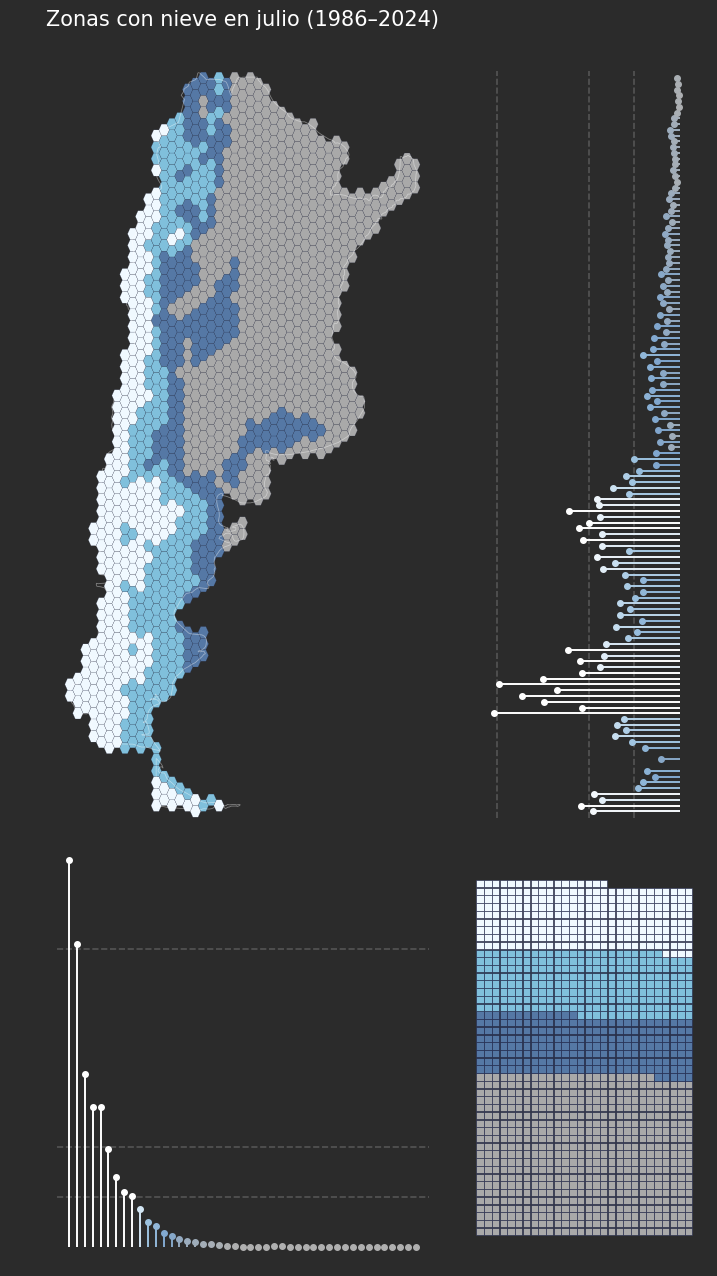

In [5]:
# --- Módulos necesarios ---
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.colors import Normalize
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from math import sqrt

# --- Asegurar formato de fecha ---
df_july["date"] = pd.to_datetime(df_july["date"])

# --- Cargar shapefile de Argentina ---
gdf_world = gpd.read_file("ne_50m_admin_0_countries.shp")
argentina_shape = gdf_world[gdf_world["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Crear grilla hexagonal ---
def generate_hex_grid(bounds, hex_diameter):
    xmin, ymin, xmax, ymax = bounds
    hex_radius = hex_diameter / 2
    hex_height = sqrt(3) * hex_radius
    horiz_spacing = 1.5 * hex_radius
    vert_spacing = hex_height
    cols = int((xmax - xmin) / horiz_spacing) + 1
    rows = int((ymax - ymin) / vert_spacing) + 1

    hexagons = []
    for row in range(rows):
        for col in range(cols):
            x_offset = xmin + col * horiz_spacing
            y_offset = ymin + row * vert_spacing
            if col % 2 == 1:
                y_offset += vert_spacing / 2
            hexagon = Polygon([
                (
                    x_offset + hex_radius * np.cos(np.radians(angle)),
                    y_offset + hex_radius * np.sin(np.radians(angle))
                )
                for angle in range(0, 360, 60)
            ])
            hexagons.append(hexagon)

    return gpd.GeoDataFrame(geometry=hexagons, crs="EPSG:4326")

# --- Función para agregar promedio por hexágono ---
def compute_snow_hex_from_avg(df_avg, argentina_shape, hex_grid_base):
    geometry = [Point(xy) for xy in zip(df_avg["longitude"], df_avg["latitude"])]
    gdf = gpd.GeoDataFrame(df_avg, geometry=geometry, crs="EPSG:4326")
    gdf_clipped = gdf[gdf.within(argentina_shape.geometry.values[0])]
    joined = gpd.sjoin(gdf_clipped, hex_grid_base, how="inner", predicate="within")
    hex_avg = joined.groupby("index_right")["snowfall_avg40"].mean()
    hex_grid = hex_grid_base.copy()
    hex_grid["snowfall_avg40"] = hex_avg
    return hex_grid

# --- Crear grilla base ---
hex_diameter = 0.6
bounds = argentina_shape.total_bounds
hex_grid_base = generate_hex_grid(bounds, hex_diameter)

# --- Filtrar solo julio y últimos 10 años ---
df_july = df_july[df_july["date"].dt.month == 7]
df_july = df_july[df_july["date"].dt.year.between(1986, 2025)]

# --- Agregar año y filtrar extremos ---
df_july["year"] = df_july["date"].dt.year
df_july = df_july[df_july["snowfall_mm"] <= 100]

# --- Calcular promedio anual de nieve por punto ---
df_by_year = df_july.groupby(["latitude", "longitude", "year"])["snowfall_mm"].sum().reset_index()
df_avg = df_by_year.groupby(["latitude", "longitude"])["snowfall_mm"].mean().reset_index()
df_avg.rename(columns={"snowfall_mm": "snowfall_avg40"}, inplace=True)

# --- Calcular hexágonos promedio ---
hex_avg10 = compute_snow_hex_from_avg(df_avg, argentina_shape, hex_grid_base)
hex_avg10 = hex_avg10[hex_avg10.intersects(argentina_shape.geometry.union_all())]

# --- Calcular la longitud de corte (centro geográfico aproximado) ---
longitud_mediana = argentina_shape.total_bounds[0] + (argentina_shape.total_bounds[2] - argentina_shape.total_bounds[0]) / 2

# --- Separar hexágonos NaN ---
hex_nan = hex_avg10[hex_avg10["snowfall_avg40"].isna()]

# --- Eliminar hexágonos al oeste con NaN ---
hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
hex_avg10 = hex_avg10.drop(index=hex_to_drop)

# --- Reemplazar NaN al este por 0 ---
hex_avg10.loc[hex_avg10["snowfall_avg40"].isna() & 
               (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana), "snowfall_avg40"] = 0
hex_avg10["snowfall_avg40"] = hex_avg10["snowfall_avg40"].fillna(0)

# --- Clasificar presencia e intensidad de nieve ---
def clasificar_nieve(mm):
    if mm < 1:
        return "Sin nieve"
    elif mm < 10:
        return "Muy poca"
    elif mm < 50:
        return "Moderada"
    else:
        return "Frecuente"

hex_avg10["clase_nieve"] = hex_avg10["snowfall_avg40"].apply(clasificar_nieve)

# --- Colores para cada clase ---
colores_nieve = {
    "Sin nieve": "#a9a9a9",
    "Muy poca": "#5578a5",
    "Moderada": "#80c0dc",
    "Frecuente": "#f0f9ff"
}

# --- Crear figura con subplots ---
fig = plt.figure(figsize=(9, 16), facecolor="#2b2b2b")
gs = GridSpec(3, 3, figure=fig)
gs.update(wspace=0.0, hspace=0.0)
ax_main = fig.add_subplot(gs[0:2, 0:2])  # Mapa principal
ax_right = fig.add_subplot(gs[0:2, 2], sharey=ax_main)  # Lollipop latitud
ax_bottom = fig.add_subplot(gs[2, 0:2])  # Lollipop longitud
ax_corner = fig.add_subplot(gs[2, 2])    # Waffle

# --- Gráfico principal ---
for clase, color in colores_nieve.items():
    hex_avg10[hex_avg10["clase_nieve"] == clase].plot(
        ax=ax_main, color=color, edgecolor="#20264a", linewidth=0.1, label=clase
    )

argentina_shape.boundary.plot(ax=ax_main, color="white", linewidth=0.6, alpha=0.4)
ax_main.set_title("Zonas con nieve en julio (1986–2024)", fontsize=15, color="white")
ax_main.set_axis_off()

leyenda_manual = [
    Patch(facecolor=color, edgecolor="#20264a", label=clase)
    for clase, color in colores_nieve.items()
]

# GRAFICO LOLLIPOP PANEL ARRIBA-DERECHA

from matplotlib.colors import Normalize, LinearSegmentedColormap

# --- Datos para gráfico lateral por latitud ---
hex_avg10["latitude"] = hex_avg10.geometry.centroid.y.round(2)
df_latitud = hex_avg10.groupby("latitude")["snowfall_avg40"].mean().reset_index()

# --- Colormap desde gris claro a blanco ---
cmap_gris_azul_blanco = LinearSegmentedColormap.from_list(
    "gris_azul_blanco_expandido",
    ["#b0b0b0", "#7fa6ce", "#9bc1df", "#d0e4f3", "#ffffff"]
)

# --- Normalización y colores ---
norm = Normalize(vmin=0, vmax=100)
colors = [cmap_gris_azul_blanco(norm(val)) for val in df_latitud["snowfall_avg40"]]

# --- Dibujar lollipops ---
for i, row in df_latitud.iterrows():
    lat = row["latitude"]
    nieve = row["snowfall_avg40"]
    color = colors[i]
    
    ax_right.hlines(lat, xmin=nieve, xmax=0, color=color, linewidth=1.4)
    ax_right.plot(nieve, lat, "o", color=color, markersize=4)

# Fondo oscuro
ax_right.set_facecolor("#2b2b2b")

# Eje X invertido
max_val = df_latitud["snowfall_avg40"].max() * 1.1
ax_right.set_xlim(max_val, -30)

# Mostrar solo línea del eje Y (sin ticks ni etiquetas)
ax_right.spines["left"].set_visible(True)
ax_right.spines["left"].set_color("white")
ax_right.spines["left"].set_linewidth(1.2)
ax_right.tick_params(axis="y", left=False, labelleft=False)

# --- Rango visible del eje Y ---
lat_min = df_latitud["latitude"].min()
lat_max = df_latitud["latitude"].max()

# --- Líneas verticales de referencia con altura controlada ---
for xval in [50, 100, 200]:
    ax_right.vlines(
        x=xval,
        ymin=lat_min-0.3,
        ymax=lat_max+0.3,
        color="#555555",
        linestyle="--",
        linewidth=1.2,
        zorder=-3
    )

# Quitar ticks y etiquetas del eje X
ax_right.set_xticks([])
ax_right.set_xticklabels([])

# Quitar otras espinas
for side in ["top", "right", "bottom"]:
    ax_right.spines[side].set_visible(False)

# Sin grilla
ax_right.grid(False)

### GRAFICO LOLLIPOP PANEL ABAJO-IZQUIERDA

from matplotlib.colors import Normalize, LinearSegmentedColormap

# --- Datos para gráfico inferior por longitud ---
hex_avg10["longitude"] = hex_avg10.geometry.centroid.x.round(2)
df_longitud = hex_avg10.groupby("longitude")["snowfall_avg40"].mean().reset_index()

# --- Colormap extendido: gris claro → azul medio → azul claro → blanco ---
cmap_gris_azul_blanco = LinearSegmentedColormap.from_list(
    "gris_azul_blanco_expandido",
    [
        "#b0b0b0",
        "#7fa6ce",
        "#9bc1df",
        "#d0e4f3",
        "#ffffff"
    ]
)

# --- Normalización y colores ---
norm = Normalize(vmin=0, vmax=100)
colors_lon = [cmap_gris_azul_blanco(norm(val)) for val in df_longitud["snowfall_avg40"]]

# Fondo
ax_bottom.set_facecolor("#2b2b2b")

# --- Lollipops verticales ---
for i, row in df_longitud.iterrows():
    lon = row["longitude"]
    nieve = row["snowfall_avg40"]
    color = colors_lon[i]

    ax_bottom.vlines(lon, ymin=0, ymax=nieve, color=color, linewidth=1.4)
    ax_bottom.plot(lon, nieve, "o", color=color, markersize=4)

# --- Líneas de referencia horizontales en 50, 100, 200 mm ---
for yval in [100, 200, 600]:
    ax_bottom.axhline(y=yval, xmin=0.1, xmax=0.9, color="#555555", linestyle="--", linewidth=1.2, zorder=-1)

# --- Padding horizontal y vertical ---
lon_min = df_longitud["longitude"].min()
lon_max = df_longitud["longitude"].max()
lon_range = lon_max - lon_min
padding_x = 0.17 * lon_range

nieve_max = df_longitud["snowfall_avg40"].max()
nieve_min = df_longitud["snowfall_avg40"].min()
nieve_range = nieve_max - nieve_min
padding_y = 0.05 * nieve_range

# --- Ejes con padding aplicado ---
ax_bottom.set_xlim(lon_min - padding_x, lon_max + padding_x)
ax_bottom.set_ylim(nieve_min - padding_y, nieve_max + 10)

# Mostrar solo línea del eje X (sin ticks ni etiquetas del eje Y)
ax_bottom.spines["bottom"].set_visible(True)
ax_bottom.spines["bottom"].set_color("white")
ax_bottom.spines["bottom"].set_linewidth(1.2)
ax_bottom.tick_params(axis="x", bottom=False, labelbottom=False)

# Quitar espinas restantes y grilla
for side in ["left", "top", "right"]:
    ax_bottom.spines[side].set_visible(False)
ax_bottom.grid(False)

# Ocultar etiquetas y ticks de Y
ax_bottom.set_yticks([])
ax_bottom.set_yticklabels([])

###

## WAFFLE

from matplotlib.patches import Rectangle

# --- Preparar datos del waffle chart desde hex_avg10 ---
hex_counts = hex_avg10["clase_nieve"].value_counts().reindex([
    "Sin nieve", "Muy poca", "Moderada", "Frecuente"
], fill_value=0)

waffle_clases = []
for clase, count in hex_counts.items():
    waffle_clases.extend([clase] * count)

waffle_df = pd.DataFrame({"clase_nieve": waffle_clases})
waffle_df["color"] = waffle_df["clase_nieve"].map(colores_nieve)
waffle_df = waffle_df.reset_index(drop=True)

# --- Parámetros de grilla ---
square_size = 1.0
n_cols = 28
spacing_x = square_size * 1.05
spacing_y = square_size * 1.05
total_rows = (len(waffle_df) + n_cols - 1) // n_cols

# --- Padding personalizado ---
padding_left = 0.2 * square_size
padding_right = 2 * square_size
padding_top = 0.1 * square_size
padding_bottom = 1.0 * square_size

# --- Dibujar en ax_corner ---
ax_corner.set_facecolor("#2b2b2b")

for i, row in waffle_df.iterrows():
    col = i % n_cols
    row_idx = i // n_cols
    x = padding_left + col * spacing_x
    y = padding_bottom + row_idx * spacing_y
    rect = Rectangle(
        (x, y),
        width=square_size,
        height=square_size,
        facecolor=row["color"],
        edgecolor="#20264a",
        linewidth=0.4
    )
    ax_corner.add_patch(rect)

# --- Ajustar ejes con padding aplicado ---
waffle_width = padding_left + n_cols * spacing_x + padding_right
waffle_height = padding_bottom + total_rows * spacing_y + padding_top

ax_corner.set_xlim(0, waffle_width)
ax_corner.set_ylim(0, waffle_height)
ax_corner.set_aspect("equal")
ax_corner.axis("off")

##

# --- Otros subplots (visualización de bordes) ---
ax_bottom.set_facecolor("#2b2b2b")  # mantenemos el fondo oscuro
# ax_bottom.set_axis_off()  # desactivado para ver bordes

ax_corner.set_facecolor("#2b2b2b")
ax_corner.set_xticks([])
ax_corner.set_yticks([])


# --- Activar y colorear rebordes de cada subplot ---
for ax in [ax_main, ax_right, ax_bottom, ax_corner]:
    for spine in ax.spines.values():
        spine.set_visible(False)
        spine.set_edgecolor("#cccccc")  # gris claro
        spine.set_linewidth(1)

# --- Después de correr el bloque histórico ---
hex_hist = hex_avg10.copy()
hex_hist = hex_hist.rename(columns={"snowfall_avg40": "snowfall"})

fig.savefig("nieve_julio_argentina.png", dpi=400, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/629885196.py:88: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/629885196.py:93: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana), "snowfall_avg40"] = 0


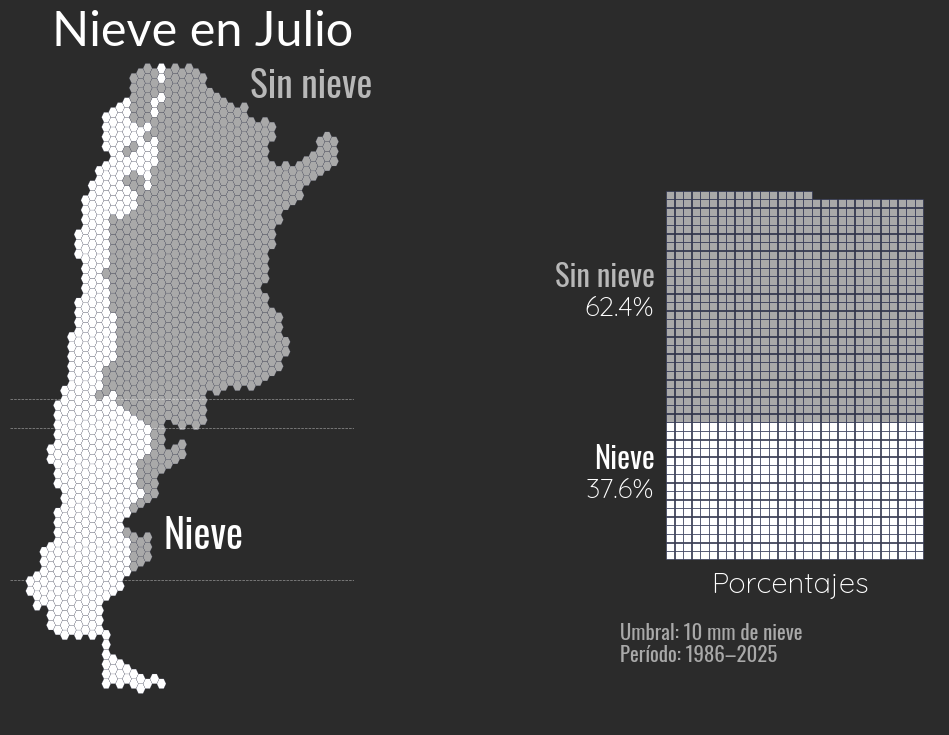

In [33]:
# --- Módulos necesarios ---
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from math import sqrt
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow, fig_arrow

# --- Asegurar formato de fecha ---
df_july["date"] = pd.to_datetime(df_july["date"])

# --- Cargar shapefile de Argentina ---
gdf_world = gpd.read_file("ne_50m_admin_0_countries.shp")
argentina_shape = gdf_world[gdf_world["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Crear grilla hexagonal ---
def generate_hex_grid(bounds, hex_diameter):
    xmin, ymin, xmax, ymax = bounds
    hex_radius = hex_diameter / 2
    hex_height = sqrt(3) * hex_radius
    horiz_spacing = 1.5 * hex_radius
    vert_spacing = hex_height
    cols = int((xmax - xmin) / horiz_spacing) + 1
    rows = int((ymax - ymin) / vert_spacing) + 1

    hexagons = []
    for row in range(rows):
        for col in range(cols):
            x_offset = xmin + col * horiz_spacing
            y_offset = ymin + row * vert_spacing
            if col % 2 == 1:
                y_offset += vert_spacing / 2
            hexagon = Polygon([
                (
                    x_offset + hex_radius * np.cos(np.radians(angle)),
                    y_offset + hex_radius * np.sin(np.radians(angle))
                )
                for angle in range(0, 360, 60)
            ])
            hexagons.append(hexagon)

    return gpd.GeoDataFrame(geometry=hexagons, crs="EPSG:4326")

# --- Función para agregar promedio por hexágono ---
def compute_snow_hex_from_avg(df_avg, argentina_shape, hex_grid_base):
    geometry = [Point(xy) for xy in zip(df_avg["longitude"], df_avg["latitude"])]
    gdf = gpd.GeoDataFrame(df_avg, geometry=geometry, crs="EPSG:4326")
    gdf_clipped = gdf[gdf.within(argentina_shape.geometry.values[0])]
    joined = gpd.sjoin(gdf_clipped, hex_grid_base, how="inner", predicate="within")
    hex_avg = joined.groupby("index_right")["snowfall_avg40"].mean()
    hex_grid = hex_grid_base.copy()
    hex_grid["snowfall_avg40"] = hex_avg
    return hex_grid

# --- Crear grilla base ---
hex_diameter = 0.6
bounds = argentina_shape.total_bounds
hex_grid_base = generate_hex_grid(bounds, hex_diameter)

# --- Filtrar solo julio y últimos 10 años ---
df_july = df_july[df_july["date"].dt.month == 7]
df_july = df_july[df_july["date"].dt.year.between(1986, 2025)]

# --- Agregar año y filtrar extremos ---
df_july["year"] = df_july["date"].dt.year
df_july = df_july[df_july["snowfall_mm"] <= 100]

# --- Calcular promedio anual de nieve por punto ---
df_by_year = df_july.groupby(["latitude", "longitude", "year"])["snowfall_mm"].sum().reset_index()
df_avg = df_by_year.groupby(["latitude", "longitude"])["snowfall_mm"].mean().reset_index()
df_avg.rename(columns={"snowfall_mm": "snowfall_avg40"}, inplace=True)

# --- Calcular hexágonos promedio ---
hex_avg10 = compute_snow_hex_from_avg(df_avg, argentina_shape, hex_grid_base)
hex_avg10 = hex_avg10[hex_avg10.intersects(argentina_shape.geometry.union_all())]

# --- Calcular la longitud de corte (centro geográfico aproximado) ---
longitud_mediana = argentina_shape.total_bounds[0] + (argentina_shape.total_bounds[2] - argentina_shape.total_bounds[0]) / 2

# --- Separar hexágonos NaN ---
hex_nan = hex_avg10[hex_avg10["snowfall_avg40"].isna()]

# --- Eliminar hexágonos al oeste con NaN ---
hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
hex_avg10 = hex_avg10.drop(index=hex_to_drop)

# --- Reemplazar NaN al este por 0 ---
hex_avg10.loc[hex_avg10["snowfall_avg40"].isna() & 
               (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana), "snowfall_avg40"] = 0
hex_avg10["snowfall_avg40"] = hex_avg10["snowfall_avg40"].fillna(0)

# --- Clasificación binaria nieve / sin nieve ---
hex_avg10["snow_binary"] = hex_avg10["snowfall_avg40"].apply(lambda x: "Con nieve" if x >= 10 else "Sin nieve")

# --- Colores binarios ---
colores_binarios = {"Con nieve": "#ffffff", "Sin nieve": "#a9a9a9"}

# --- Crear figura y subplots (2 paneles: mapa a la izquierda, waffle a la derecha) ---
fig = plt.figure(figsize=(16, 9), facecolor="#2b2b2b")
gs = GridSpec(1, 2, figure=fig, width_ratios=[3.5, 1])
ax_map = fig.add_subplot(gs[0, 0])
ax_waffle = fig.add_subplot(gs[0, 1])

# --- Mapa binario ---
for clase, color in colores_binarios.items():
    hex_avg10[hex_avg10["snow_binary"] == clase].plot(
        ax=ax_map, color=color, edgecolor="#20264a", linewidth=0.1
    )

ax_map.set_axis_off()

# --- Añadir líneas de referencia para cerros ---
latitudes_montanas = {
    "Cerro Lanín": -39.63,
    "Cerro Tronador": -41.15,
    "Cerro Fitz Roy": -49.27
}

for nombre, lat in latitudes_montanas.items():
    ax_map.axhline(
        y=lat,
        color='white',
        linestyle='dashed',
        linewidth=0.5,
        alpha=0.5
    )

# --- Preparar datos para waffle chart ---
hex_counts_bin = hex_avg10["snow_binary"].value_counts().reindex(["Con nieve", "Sin nieve"], fill_value=0)
waffle_labels_bin = []
for clase, count in hex_counts_bin.items():
    waffle_labels_bin.extend([clase] * count)
waffle_df_bin = pd.DataFrame({"clase": waffle_labels_bin})
waffle_df_bin["color"] = waffle_df_bin["clase"].map(colores_binarios)
waffle_df_bin = waffle_df_bin.reset_index(drop=True)

# --- Dibujar waffle chart ---
square_size = 1.0
n_cols = 30
spacing_x = square_size * 1.05
spacing_y = square_size * 1.05
total_rows = (len(waffle_df_bin) + n_cols - 1) // n_cols
padding_left = 0.2 * square_size
padding_right = 2 * square_size
padding_top = 0.1 * square_size
padding_bottom = 1.0 * square_size
ax_waffle.set_facecolor("#2b2b2b")
ax_waffle.clear()

label_coords = {}
total_hex = len(waffle_df_bin)
porcentajes = hex_counts_bin / total_hex * 100

for i, row in waffle_df_bin.iterrows():
    col = i % n_cols
    row_idx = i // n_cols
    x = padding_left + col * spacing_x
    y = padding_bottom + row_idx * spacing_y
    rect = Rectangle((x, y), width=square_size, height=square_size,
                     facecolor=row["color"], edgecolor="#20264a", linewidth=0.4)
    ax_waffle.add_patch(rect)
    if row["clase"] not in label_coords:
        label_coords[row["clase"]] = (x, y)

# --- Calcular centro vertical por clase ---
label_positions = {}

for clase in ["Con nieve", "Sin nieve"]:
    coords = [
        (padding_left + (i % n_cols) * spacing_x,
         padding_bottom + (i // n_cols) * spacing_y)
        for i, v in waffle_df_bin["clase"].items() if v == clase
    ]
    if coords:
        xs, ys = zip(*coords)
        x_text = min(xs) - 1.5  # a la izquierda
        y_text = np.mean(ys) + square_size / 2  # centro vertical + ajuste fino
        label_positions[clase] = (x_text, y_text)

# --- Dibujar textos con porcentajes ---
for clase, (x_text, y_text) in label_positions.items():
    ax_waffle.text(x_text, y_text, f"{porcentajes[clase]:.1f}%",
                   color="white", ha="right", va="center", fontsize=20,
                   fontproperties=quick)

ax_waffle.text(padding_left+5.5, padding_bottom - 1.4,
               "Porcentajes",
               fontsize=21, color="white", ha="left", va="top", fontproperties=quick)

waffle_width = padding_left + n_cols * spacing_x + padding_right
waffle_height = padding_bottom + total_rows * spacing_y + padding_top
ax_waffle.set_xlim(0, waffle_width)
ax_waffle.set_ylim(0, waffle_height)
ax_waffle.set_aspect("equal")
ax_waffle.axis("off")

# ---- Comments (with oswald) ----
fig.text(
    0.545, 0.82,
    "Sin nieve",
    ha="right", va="center",
    fontsize=27, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)

# ---- Comments (with oswald) ----
fig.text(
    0.465, 0.32,
    "Nieve",
    ha="right", va="center",
    fontsize=29, color="white",
    fontproperties=oswald,
    linespacing=1
)

# ---- Comments (with oswald) ----
fig.text(
    0.722, 0.607,
    "Sin nieve",
    ha="right", va="center",
    fontsize=22, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)
# ---- Comments (with oswald) ----
fig.text(
    0.722, 0.405,
    "Nieve",
    ha="right", va="center",
    fontsize=22, color="white",
    fontproperties=oswald,
    linespacing=1
)

fig.text(
    0.7, 0.2,
    "Umbral: 10 mm de nieve\nPeríodo: 1986–2025",
    color="darkgray",
    fontsize=15,
    ha="left", va="center",
    fontproperties=oswald,
    linespacing=1.15
)

fig.text(
    0.345, 0.88,
    "Nieve en Julio",
    color="white",
    fontsize=35,
    ha="left", va="center",
    fontproperties=lato,
    linespacing=1.15
)

import matplotlib as mpl

# --- Convertir texto a contornos vectoriales (paths) en SVG ---
mpl.rcParams['svg.fonttype'] = 'path'

plt.subplots_adjust(wspace=0)

# --- Exportar como PNG ---
fig.savefig("nieve_binaria_argentina_esp.png", dpi=400, bbox_inches="tight", facecolor=fig.get_facecolor())

# --- Exportar como SVG con texto convertido a contornos ---
fig.savefig("nieve_binaria_argentina_esp.svg", format="svg", bbox_inches="tight", pad_inches=0.25, facecolor=fig.get_facecolor())

plt.show()

/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/1992133530.py:85: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/1992133530.py:91: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana),
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/1992133530.py:146: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_avg10["latitude"] = hex

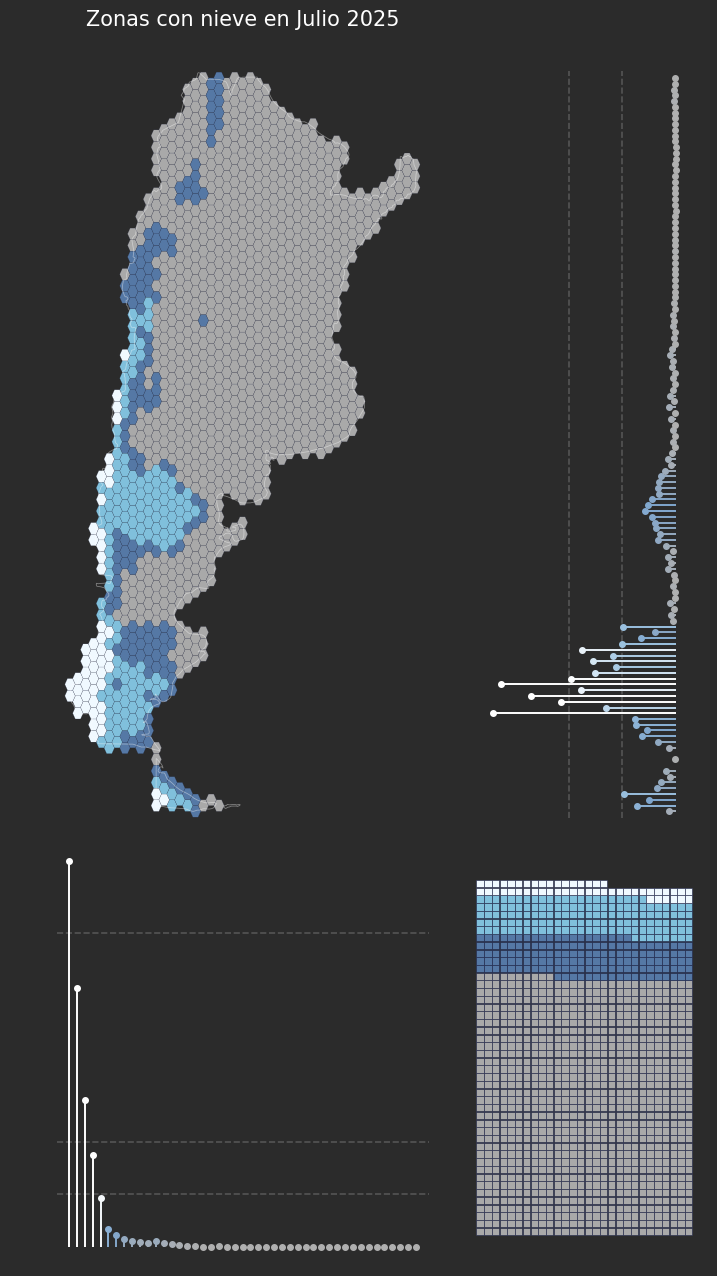

In [34]:
# --- Módulos necesarios ---
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.colors import Normalize
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from math import sqrt

# --- Asegurar formato de fecha ---
df_july["date"] = pd.to_datetime(df_july["date"])

# --- Cargar shapefile de Argentina ---
gdf_world = gpd.read_file("ne_50m_admin_0_countries.shp")
argentina_shape = gdf_world[gdf_world["ADMIN"] == "Argentina"].to_crs("EPSG:4326")

# --- Crear grilla hexagonal ---
def generate_hex_grid(bounds, hex_diameter):
    xmin, ymin, xmax, ymax = bounds
    hex_radius = hex_diameter / 2
    hex_height = sqrt(3) * hex_radius
    horiz_spacing = 1.5 * hex_radius
    vert_spacing = hex_height
    cols = int((xmax - xmin) / horiz_spacing) + 1
    rows = int((ymax - ymin) / vert_spacing) + 1

    hexagons = []
    for row in range(rows):
        for col in range(cols):
            x_offset = xmin + col * horiz_spacing
            y_offset = ymin + row * vert_spacing
            if col % 2 == 1:
                y_offset += vert_spacing / 2
            hexagon = Polygon([
                (
                    x_offset + hex_radius * np.cos(np.radians(angle)),
                    y_offset + hex_radius * np.sin(np.radians(angle))
                )
                for angle in range(0, 360, 60)
            ])
            hexagons.append(hexagon)

    return gpd.GeoDataFrame(geometry=hexagons, crs="EPSG:4326")

# --- Función para agregar promedio por hexágono ---
def compute_snow_hex_from_avg(df_avg, argentina_shape, hex_grid_base):
    geometry = [Point(xy) for xy in zip(df_avg["longitude"], df_avg["latitude"])]
    gdf = gpd.GeoDataFrame(df_avg, geometry=geometry, crs="EPSG:4326")
    gdf_clipped = gdf[gdf.within(argentina_shape.geometry.values[0])]
    joined = gpd.sjoin(gdf_clipped, hex_grid_base, how="inner", predicate="within")
    hex_avg = joined.groupby("index_right")["snowfall_avg10"].mean()
    hex_grid = hex_grid_base.copy()
    hex_grid["snowfall_avg10"] = hex_avg
    return hex_grid

# --- Crear grilla base ---
hex_diameter = 0.6
bounds = argentina_shape.total_bounds
hex_grid_base = generate_hex_grid(bounds, hex_diameter)

# --- Filtrar solo julio de 2025 ---
df_july_2025 = df_july[
    (df_july["date"].dt.month == 7) &
    (df_july["date"].dt.year == 2025) &
    (df_july["snowfall_mm"] <= 100)
]

# --- Sumar nieve acumulada por punto en julio 2025 ---
df_2025 = df_july_2025.groupby(["latitude", "longitude"])["snowfall_mm"].sum().reset_index()
df_2025.rename(columns={"snowfall_mm": "snowfall_avg10"}, inplace=True)

# --- Calcular hexágonos para 2025 ---
hex_avg10 = compute_snow_hex_from_avg(df_2025, argentina_shape, hex_grid_base)
hex_avg10 = hex_avg10[hex_avg10.intersects(argentina_shape.geometry.union_all())]

# --- Calcular la longitud de corte (centro geográfico aproximado) ---
longitud_mediana = argentina_shape.total_bounds[0] + (argentina_shape.total_bounds[2] - argentina_shape.total_bounds[0]) / 2

# --- Separar hexágonos NaN ---
hex_nan = hex_avg10[hex_avg10["snowfall_avg10"].isna()]

# --- Eliminar hexágonos al oeste con NaN ---
hex_to_drop = hex_nan[hex_nan.geometry.centroid.to_crs(epsg=3857).x < longitud_mediana].index
hex_avg10 = hex_avg10.drop(index=hex_to_drop)

# --- Reemplazar NaN al este por 0 ---
hex_avg10.loc[
    hex_avg10["snowfall_avg10"].isna() &
    (hex_avg10.geometry.centroid.to_crs(epsg=3857).x >= longitud_mediana),
    "snowfall_avg10"
] = 0
hex_avg10["snowfall_avg10"] = hex_avg10["snowfall_avg10"].fillna(0)

# --- Clasificar presencia e intensidad de nieve ---
def clasificar_nieve(mm):
    if mm < 1:
        return "Sin nieve"
    elif mm < 10:
        return "Muy poca"
    elif mm < 50:
        return "Moderada"
    else:
        return "Frecuente"

hex_avg10["clase_nieve"] = hex_avg10["snowfall_avg10"].apply(clasificar_nieve)

# --- Colores para cada clase ---
colores_nieve = {
    "Sin nieve": "#a9a9a9",
    "Muy poca": "#5578a5",
    "Moderada": "#80c0dc",
    "Frecuente": "#f0f9ff"
}

# --- Crear figura con subplots ---
fig = plt.figure(figsize=(9, 16), facecolor="#2b2b2b")
gs = GridSpec(3, 3, figure=fig)
gs.update(wspace=0.0, hspace=0.0)
ax_main = fig.add_subplot(gs[0:2, 0:2])  # Mapa principal
ax_right = fig.add_subplot(gs[0:2, 2], sharey=ax_main)  # Lollipop latitud
ax_bottom = fig.add_subplot(gs[2, 0:2])  # Lollipop longitud
ax_corner = fig.add_subplot(gs[2, 2])    # Waffle

# --- Gráfico principal ---
for clase, color in colores_nieve.items():
    hex_avg10[hex_avg10["clase_nieve"] == clase].plot(
        ax=ax_main, color=color, edgecolor="#20264a", linewidth=0.1, label=clase
    )

argentina_shape.boundary.plot(ax=ax_main, color="white", linewidth=0.6, alpha=0.4)
ax_main.set_title("Zonas con nieve en Julio 2025", fontsize=15, color="white")
ax_main.set_axis_off()

leyenda_manual = [
    Patch(facecolor=color, edgecolor="#20264a", label=clase)
    for clase, color in colores_nieve.items()
]

# GRAFICO LOLLIPOP PANEL ARRIBA-DERECHA

from matplotlib.colors import Normalize, LinearSegmentedColormap

# --- Datos para gráfico lateral por latitud ---
hex_avg10["latitude"] = hex_avg10.geometry.centroid.y.round(2)
df_latitud = hex_avg10.groupby("latitude")["snowfall_avg10"].mean().reset_index()

# --- Colormap desde gris claro a blanco ---
cmap_gris_azul_blanco = LinearSegmentedColormap.from_list(
    "gris_azul_blanco_expandido",
    ["#b0b0b0", "#7fa6ce", "#9bc1df", "#d0e4f3", "#ffffff"]
)

# --- Normalización y colores ---
norm = Normalize(vmin=0, vmax=100)
colors = [cmap_gris_azul_blanco(norm(val)) for val in df_latitud["snowfall_avg10"]]

# --- Dibujar lollipops ---
for i, row in df_latitud.iterrows():
    lat = row["latitude"]
    nieve = row["snowfall_avg10"]
    color = colors[i]
    
    ax_right.hlines(lat, xmin=nieve, xmax=0, color=color, linewidth=1.4)
    ax_right.plot(nieve, lat, "o", color=color, markersize=4)

# Fondo oscuro
ax_right.set_facecolor("#2b2b2b")

# Eje X invertido
max_val = df_latitud["snowfall_avg10"].max() * 1.1
ax_right.set_xlim(max_val, -30)

# Mostrar solo línea del eje Y (sin ticks ni etiquetas)
ax_right.spines["left"].set_visible(True)
ax_right.spines["left"].set_color("white")
ax_right.spines["left"].set_linewidth(1.2)
ax_right.tick_params(axis="y", left=False, labelleft=False)

# --- Rango visible del eje Y ---
lat_min = df_latitud["latitude"].min()
lat_max = df_latitud["latitude"].max()

# --- Líneas verticales de referencia con altura controlada ---
for xval in [50, 100, 200]:
    ax_right.vlines(
        x=xval,
        ymin=lat_min-0.3,
        ymax=lat_max+0.3,
        color="#555555",
        linestyle="--",
        linewidth=1.2,
        zorder=-3
    )

# Quitar ticks y etiquetas del eje X
ax_right.set_xticks([])
ax_right.set_xticklabels([])

# Quitar otras espinas
for side in ["top", "right", "bottom"]:
    ax_right.spines[side].set_visible(False)

# Sin grilla
ax_right.grid(False)

### GRAFICO LOLLIPOP PANEL ABAJO-IZQUIERDA

from matplotlib.colors import Normalize, LinearSegmentedColormap

# --- Datos para gráfico inferior por longitud ---
hex_avg10["longitude"] = hex_avg10.geometry.centroid.x.round(2)
df_longitud = hex_avg10.groupby("longitude")["snowfall_avg10"].mean().reset_index()

# --- Colormap extendido: gris claro → azul medio → azul claro → blanco ---
cmap_gris_azul_blanco = LinearSegmentedColormap.from_list(
    "gris_azul_blanco_expandido",
    [
        "#b0b0b0",
        "#7fa6ce",
        "#9bc1df",
        "#d0e4f3",
        "#ffffff"
    ]
)

# --- Normalización y colores ---
norm = Normalize(vmin=0, vmax=100)
colors_lon = [cmap_gris_azul_blanco(norm(val)) for val in df_longitud["snowfall_avg10"]]

# Fondo
ax_bottom.set_facecolor("#2b2b2b")

# --- Lollipops verticales ---
for i, row in df_longitud.iterrows():
    lon = row["longitude"]
    nieve = row["snowfall_avg10"]
    color = colors_lon[i]

    ax_bottom.vlines(lon, ymin=0, ymax=nieve, color=color, linewidth=1.4)
    ax_bottom.plot(lon, nieve, "o", color=color, markersize=4)

# --- Líneas de referencia horizontales en 50, 100, 200 mm ---
for yval in [100, 200, 600]:
    ax_bottom.axhline(y=yval, xmin=0.1, xmax=0.9, color="#555555", linestyle="--", linewidth=1.2, zorder=-1)

# --- Padding horizontal y vertical ---
lon_min = df_longitud["longitude"].min()
lon_max = df_longitud["longitude"].max()
lon_range = lon_max - lon_min
padding_x = 0.17 * lon_range

nieve_max = df_longitud["snowfall_avg10"].max()
nieve_min = df_longitud["snowfall_avg10"].min()
nieve_range = nieve_max - nieve_min
padding_y = 0.05 * nieve_range

# --- Ejes con padding aplicado ---
ax_bottom.set_xlim(lon_min - padding_x, lon_max + padding_x)
ax_bottom.set_ylim(nieve_min - padding_y, nieve_max + 10)

# Mostrar solo línea del eje X (sin ticks ni etiquetas del eje Y)
ax_bottom.spines["bottom"].set_visible(True)
ax_bottom.spines["bottom"].set_color("white")
ax_bottom.spines["bottom"].set_linewidth(1.2)
ax_bottom.tick_params(axis="x", bottom=False, labelbottom=False)

# Quitar espinas restantes y grilla
for side in ["left", "top", "right"]:
    ax_bottom.spines[side].set_visible(False)
ax_bottom.grid(False)

# Ocultar etiquetas y ticks de Y
ax_bottom.set_yticks([])
ax_bottom.set_yticklabels([])

###

## WAFFLE

from matplotlib.patches import Rectangle

# --- Preparar datos del waffle chart desde hex_avg10 ---
hex_counts = hex_avg10["clase_nieve"].value_counts().reindex([
    "Sin nieve", "Muy poca", "Moderada", "Frecuente"
], fill_value=0)

waffle_clases = []
for clase, count in hex_counts.items():
    waffle_clases.extend([clase] * count)

waffle_df = pd.DataFrame({"clase_nieve": waffle_clases})
waffle_df["color"] = waffle_df["clase_nieve"].map(colores_nieve)
waffle_df = waffle_df.reset_index(drop=True)

# --- Parámetros de grilla ---
square_size = 1.0
n_cols = 28
spacing_x = square_size * 1.05
spacing_y = square_size * 1.05
total_rows = (len(waffle_df) + n_cols - 1) // n_cols

# --- Padding personalizado ---
padding_left = 0.2 * square_size
padding_right = 2 * square_size
padding_top = 0.1 * square_size
padding_bottom = 1.0 * square_size

# --- Dibujar en ax_corner ---
ax_corner.set_facecolor("#2b2b2b")

for i, row in waffle_df.iterrows():
    col = i % n_cols
    row_idx = i // n_cols
    x = padding_left + col * spacing_x
    y = padding_bottom + row_idx * spacing_y
    rect = Rectangle(
        (x, y),
        width=square_size,
        height=square_size,
        facecolor=row["color"],
        edgecolor="#20264a",
        linewidth=0.4
    )
    ax_corner.add_patch(rect)

# --- Ajustar ejes con padding aplicado ---
waffle_width = padding_left + n_cols * spacing_x + padding_right
waffle_height = padding_bottom + total_rows * spacing_y + padding_top

ax_corner.set_xlim(0, waffle_width)
ax_corner.set_ylim(0, waffle_height)
ax_corner.set_aspect("equal")
ax_corner.axis("off")

##

# --- Otros subplots (visualización de bordes) ---
ax_bottom.set_facecolor("#2b2b2b")  # mantenemos el fondo oscuro
# ax_bottom.set_axis_off()  # desactivado para ver bordes

ax_corner.set_facecolor("#2b2b2b")
ax_corner.set_xticks([])
ax_corner.set_yticks([])


# --- Activar y colorear rebordes de cada subplot ---
for ax in [ax_main, ax_right, ax_bottom, ax_corner]:
    for spine in ax.spines.values():
        spine.set_visible(False)
        spine.set_edgecolor("#cccccc")  # gris claro
        spine.set_linewidth(1)

# --- Después de correr el bloque 2025 ---
hex_2025 = hex_avg10.copy()
hex_2025 = hex_2025.rename(columns={"snowfall_avg10": "snowfall"})

fig.savefig("nieve_julio2025_argentina.png", dpi=400, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/2225932539.py:73: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  dfl2 = dfl.groupby(group_idx, as_index=False).mean(numeric_only=True)
/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_4603/2225932539.py:73: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  dfl2 = dfl.groupby(group_idx, as_index=False).mean(numeric_only=True)


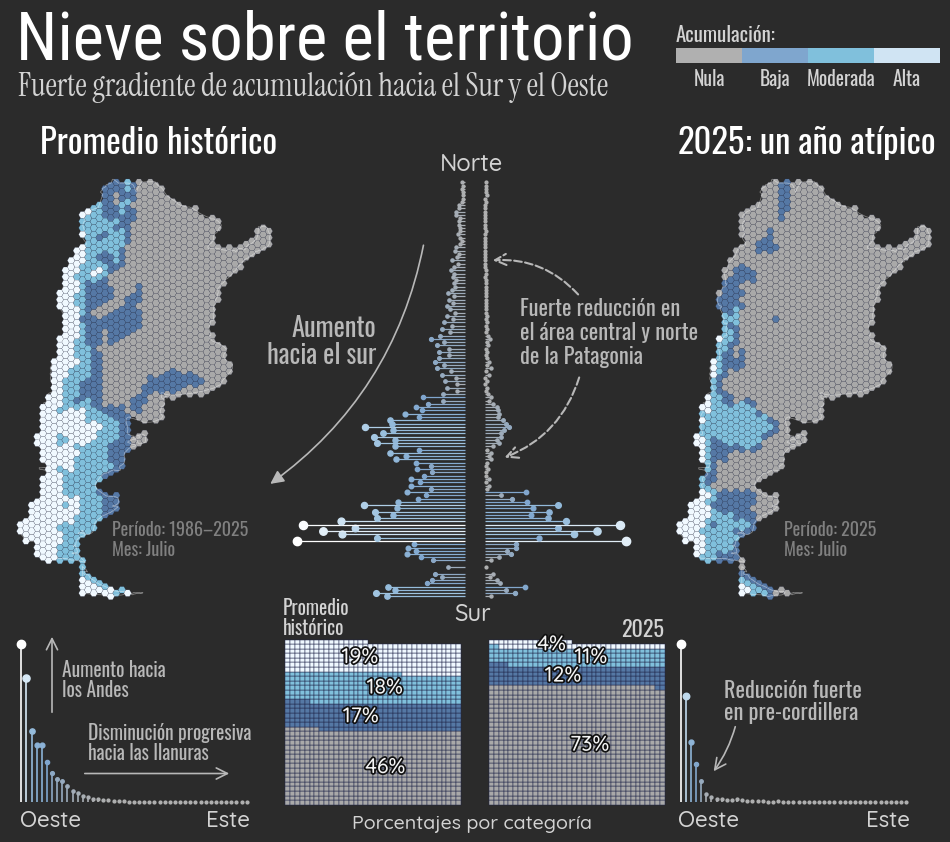

In [258]:
## import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow, fig_arrow

fondo = "#2b2b2b"

# ---------- Global padded limits ----------
xmin, ymin, xmax, ymax = argentina_shape.total_bounds
PAD_LON = 0.70
PAD_LAT = 0.70
LON_MIN, LON_MAX = xmin - PAD_LON, xmax + PAD_LON
LAT_MIN, LAT_MAX = ymin - PAD_LAT, ymax + PAD_LAT

# ----------------- Helpers -----------------
def draw_map(ax, gdf_hex, title, boundary_gdf, colores_nieve):
    ax.set_facecolor(fondo)

    # Hexágonos por clase
    for clase, color in colores_nieve.items():
        gdf_hex[gdf_hex["clase_nieve"] == clase].plot(
            ax=ax, color=color, edgecolor="#20264a", linewidth=0.1
        )

    # Límite nacional
    boundary_gdf.boundary.plot(ax=ax, color="white", linewidth=0.6, alpha=0.4)

    # Ventana y aspecto
    ax.set_xlim(LON_MIN, LON_MAX)
    ax.set_ylim(LAT_MIN, LAT_MAX)
    ax.set_aspect("equal", adjustable="box")
    ax.margins(x=0.0, y=0.0)

    # Sin títulos ni ejes
    ax.set_axis_off()

def prepare_lat_lon_profiles(gdf_hex, value_col="snowfall"):
    hex_3857 = gdf_hex.to_crs(3857)
    centros_4326 = gpd.GeoSeries(hex_3857.geometry.centroid, crs=3857).to_crs(4326)
    df_lat = (
        gdf_hex.assign(latitude=centros_4326.y.round(2))
        .groupby("latitude")[value_col].mean()
        .reset_index()
    )
    df_lon = (
        gdf_hex.assign(longitude=centros_4326.x.round(2))
        .groupby("longitude")[value_col].mean()
        .reset_index()
    )
    return df_lat, df_lon

from matplotlib.colors import Normalize, LinearSegmentedColormap

def draw_lollipop_lat(ax, df_lat, value_col_label="snowfall", reduce_factor=0.25,
                      ms_min=2.0, ms_max=6.0, vref=None, mirror=False):
    if len(df_lat) == 0 or value_col_label not in df_lat.columns:
        ax.set_facecolor(fondo); ax.set_xlim(1, 0); ax.set_ylim(LAT_MIN, LAT_MAX); ax.axis("off"); return

    dfl = df_lat[["latitude", value_col_label]].dropna().sort_values("latitude").reset_index(drop=True)
    if len(dfl) == 0:
        ax.set_facecolor(fondo); ax.set_xlim(1, 0); ax.set_ylim(LAT_MIN, LAT_MAX); ax.axis("off"); return

    # --- decimación ligera ---
    N = len(dfl)
    target_N  = int(np.ceil(N * (1 - reduce_factor)))
    group_sz  = max(1, round(N / max(1, target_N)))
    group_idx = np.arange(N) // group_sz
    dfl2 = dfl.groupby(group_idx, as_index=False).mean(numeric_only=True)

    # --- escala compartida ---
    local_max = float(dfl2[value_col_label].max()) if len(dfl2) else 1.0
    vmax = float(vref) if (vref is not None and vref > 0) else local_max
    vmin = 0.0

    val_raw  = dfl2[value_col_label].astype(float).values
    val_norm = np.clip(val_raw, vmin, vmax)

    # Colores y tamaños
    cmap = LinearSegmentedColormap.from_list(
        "gris_azul_blanco_expandido", ["#b0b0b0", "#7fa6ce", "#9bc1df", "#d0e4f3", "#ffffff"]
    )
    norm   = Normalize(vmin=vmin, vmax=vmax)
    colors = [cmap(norm(v)) for v in val_norm]

    if np.max(val_norm) > np.min(val_norm):
        size_scale = (val_norm - np.min(val_norm)) / (np.max(val_norm) - np.min(val_norm))
    else:
        size_scale = np.zeros_like(val_norm)
    ms = ms_min + size_scale * (ms_max - ms_min)

    # --- ejes y orientación ---
    ax.set_facecolor(fondo)
    ax.set_ylim(LAT_MIN, LAT_MAX)

    if mirror:
        # barras hacia la DERECHA (0 -> valor)
        ax.set_xlim(-0.05 * vmax, 1.1 * vmax)
        for lat, v, c, m in zip(dfl2["latitude"], val_raw, colors, ms):
            ax.hlines(float(lat), xmin=0.0, xmax=float(v), color=c, linewidth=0.9)
            ax.plot(float(v), float(lat), "o", color=c, markersize=float(m))
        # spine derecho visible
        ax.spines["right"].set_visible(True)
        ax.spines["right"].set_color("white")
        ax.spines["right"].set_linewidth(1.2)
        ax.spines["left"].set_visible(False)

    else:
        # barras hacia la IZQUIERDA (valor -> 0), como antes
        ax.set_xlim(1.1 * vmax, -0.05 * vmax)
        for lat, v, c, m in zip(dfl2["latitude"], val_raw, colors, ms):
            ax.hlines(float(lat), xmin=float(v), xmax=0.0, color=c, linewidth=0.9)
            ax.plot(float(v), float(lat), "o", color=c, markersize=float(m))
        # spine izquierdo visible
        ax.spines["left"].set_visible(True)
        ax.spines["left"].set_color("white")
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["right"].set_visible(False)


    # resto de estética
    ax.tick_params(axis="y", left=False, labelleft=False, right=False, labelright=False)
    ax.set_xticks([])
    for side in ["top", "bottom"]:
        ax.spines[side].set_visible(False)
    ax.grid(False)

def draw_lollipop_lon(ax, df_lon, value_col_label="snowfall",
                      ms_min=2.0, ms_max=6.0, vref=None):
    """
    Longitude lollipop chart with:
      - Full dataset (no reduction)
      - Shared vertical scale via vref
      - Marker size proportional to value
    """
    if len(df_lon) == 0 or value_col_label not in df_lon.columns:
        ax.set_facecolor(fondo); ax.set_ylim(1, 0); ax.axis("off"); return

    dfl = df_lon[["longitude", value_col_label]].dropna().sort_values("longitude")
    if len(dfl) == 0:
        ax.set_facecolor(fondo); ax.set_ylim(1, 0); ax.axis("off"); return

    # --- Y-scale ---
    local_max = float(dfl[value_col_label].max())
    vmax = float(vref) if (vref is not None and vref > 0) else local_max
    vmin = 0.0

    val_raw  = dfl[value_col_label].astype(float).values
    val_norm = np.clip(val_raw, vmin, vmax)

    # --- Colors and marker sizes ---
    cmap = LinearSegmentedColormap.from_list(
        "gris_azul_blanco_expandido",
        ["#b0b0b0", "#7fa6ce", "#9bc1df", "#d0e4f3", "#ffffff"]
    )
    norm   = Normalize(vmin=vmin, vmax=vmax)
    colors = [cmap(norm(v)) for v in val_norm]

    if np.max(val_norm) > np.min(val_norm):
        size_scale = (val_norm - np.min(val_norm)) / (np.max(val_norm) - np.min(val_norm))
    else:
        size_scale = np.zeros_like(val_norm)
    ms = ms_min + size_scale * (ms_max - ms_min)

    # --- Axes limits ---
    lon_min, lon_max = dfl["longitude"].min(), dfl["longitude"].max()
    span = lon_max - lon_min if lon_max > lon_min else 1.0

    # Independent paddings as fractions of span
    pad_left  = 0.05   # 10% of span
    pad_right = 0.15   # 25% of span

    ax.set_xlim(lon_min - pad_left * span, lon_max + pad_right * span)
    ax.set_ylim(-0.05 * vmax, 1.05 * vmax)
    ax.set_facecolor(fondo)

    # --- Draw lollipops ---
    for lon, val, c, m in zip(dfl["longitude"], val_raw, colors, ms):
        ax.vlines(float(lon), ymin=0.0, ymax=float(val), color=c, linewidth=1.2)
        ax.plot(float(lon), float(val), "o", color=c, markersize=float(m))

    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_color("white")
    ax.spines["bottom"].set_linewidth(1.2)
    ax.tick_params(axis="x", bottom=False, labelbottom=False)
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.grid(False)
    ax.set_yticks([])
    ax.set_yticklabels([])

from matplotlib import patheffects as pe
def draw_waffle(
    ax,
    gdf_hex,
    colores_nieve,
    n_cols=None,                 
    pad_left=0.025, pad_right=0.025,
    pad_top=0.005,  pad_bottom=0.01,
    edgecolor="#20264a", edge_lw=0.35
):
    """
    Dibuja un waffle chart que se adapta al tamaño del subplot.
    Coloca los cuadrados en coordenadas normalizadas (ax.transAxes),
    preserva proporciones y llena el espacio disponible con paddings controlables.
    Además, añade un porcentaje por categoría (sobre el centroid de sus celdas).
    """
    # --- Preparar data por clases ---
    hex_counts = gdf_hex["clase_nieve"].value_counts().reindex(
        ["Sin nieve", "Muy poca", "Moderada", "Frecuente"], fill_value=0
    )
    waffle_clases = []
    for clase, count in hex_counts.items():
        waffle_clases.extend([clase] * count)

    waffle_df = pd.DataFrame({"clase_nieve": waffle_clases})
    waffle_df["color"] = waffle_df["clase_nieve"].map(colores_nieve)
    n = len(waffle_df)

    ax.set_facecolor(fondo)
    ax.axis("off")

    if n == 0:
        return

    # --- Ventana disponible en coords normalizadas (0–1) ---
    avail_w = 1.0 - pad_left - pad_right
    avail_h = 1.0 - pad_top - pad_bottom
    avail_w = max(1e-6, avail_w)
    avail_h = max(1e-6, avail_h)

    # --- Elegir n_cols si no se especifica ---
    if n_cols is None:
        n_cols = int(np.ceil(np.sqrt(n * (avail_w / avail_h))))
        n_cols = max(10, n_cols)

    # Auxiliar para ajustar columnas y tamaño de celda cuadrada
    def fit_cols(n_cols_try):
        n_rows = int(np.ceil(n / max(1, n_cols_try)))
        cell_w = avail_w / n_cols_try
        cell_h = avail_h / n_rows
        cell = min(cell_w, cell_h)
        return n_rows, cell

    # Ajuste fino
    n_rows, cell = fit_cols(n_cols)
    while n_rows * cell > avail_h + 1e-9:
        n_cols += 1
        n_rows, cell = fit_cols(n_cols)

    # Dimensiones finales
    n_rows = int(np.ceil(n / n_cols))
    cell_w = cell_h = cell

    used_w = n_cols * cell_w
    used_h = n_rows * cell_h
    x0 = pad_left + (avail_w - used_w) / 2.0
    y0 = pad_bottom + (avail_h - used_h) / 2.0

    # --- Dibujar celdas y recolectar centroides por categoría ---
    centroids = {k: [] for k in hex_counts.index}  # guardará (x_c, y_c) en coords de eje
    for i, row in waffle_df.iterrows():
        col = i % n_cols
        r   = i // n_cols
        x = x0 + col * cell_w
        y = y0 + r   * cell_h
        rect = Rectangle(
            (x, y),
            width=cell_w,
            height=cell_h,
            transform=ax.transAxes,
            facecolor=row["color"],
            edgecolor=edgecolor,
            linewidth=edge_lw
        )
        ax.add_patch(rect)
        # Centro de esta celda (en coords normalizadas del eje)
        centroids[row["clase_nieve"]].append((x + cell_w/2.0, y + cell_h/2.0))

    # --- Escribir porcentaje por categoría en el centro de masa de sus celdas ---
    base = cell  # ~lado de celda en coords de eje
    fs = float(np.clip(6 + 160 * base, 9, 22))  # límites razonables

    for i, clase in enumerate(hex_counts.index):
        cnt = int(hex_counts.loc[clase])
        if cnt <= 0 or len(centroids[clase]) == 0:
            continue
        pct = 100.0 * cnt / n
        label = f"{pct:.0f}%"

        # Centro de masa de la categoría
        xs, ys = zip(*centroids[clase])
        cx = float(np.mean(xs))
        cy = float(np.mean(ys))

        # --- Desplazamiento alternado izquierda/derecha ---
        shift = -0.07  # ajustable; está en coords normalizadas del eje
        cx = cx - shift if (i % 2 == 0) else cx + shift

        # Texto con contorno para contraste
        ax.text(
            cx, cy, label,
            transform=ax.transAxes,
            ha="center", va="center",
            color="whitesmoke",
            fontsize=fs*1.5,
            fontproperties=quick_med,
            path_effects=[pe.Stroke(linewidth=2.5, foreground="#111111"), pe.Normal()]
        )

# =========================
#  FIGURE — nuevo layout (lat lollipops simétricos en columna central)
# =========================
fig = plt.figure(figsize=(12, 9), facecolor=fondo)

# filas: [arriba (mapas + lat lollipops)], [abajo (lollipops individuales + waffles)]
# cols : [hist], [lat compare/waffles], [2025]
gs = GridSpec(
    2, 3, figure=fig,
    width_ratios=[1.6, 2.3, 1.6],
    height_ratios=[2.0, 0.8],
)
gs.update(wspace=0, hspace=0.1)

# ---------- Perfiles ----------
df_lat_hist, df_lon_hist = prepare_lat_lon_profiles(hex_hist,  value_col="snowfall")
df_lat_2025, df_lon_2025 = prepare_lat_lon_profiles(hex_2025, value_col="snowfall")

# ---------- Columna 1 ----------
ax_map_hist = fig.add_subplot(gs[0, 0])
draw_map(ax_map_hist, hex_hist, "Promedio histórico", argentina_shape, colores_nieve)

ax_lon_hist_single = fig.add_subplot(gs[1, 0])
draw_lollipop_lon(ax_lon_hist_single, df_lon_hist, value_col_label="snowfall")

# ---------- Columna 2 ----------
# Arriba: lollipops de LATITUD simétricos (hist izq, 2025 der espejado)
g_lat_center = gs[0, 1].subgridspec(1, 2, wspace=0.02)
ax_lat_hist  = fig.add_subplot(g_lat_center[0, 0])
ax_lat_2025  = fig.add_subplot(g_lat_center[0, 1], sharey=ax_lat_hist)

# Escala compartida para comparabilidad
vals_hist_lat = df_lat_hist["snowfall"]
vals_2025_lat = df_lat_2025["snowfall"]
vref_lat = np.percentile(pd.concat([vals_hist_lat, vals_2025_lat]).dropna(), 98)
vref_lat = max(vref_lat, float(vals_hist_lat.max()), float(vals_2025_lat.max()))

# Dibujar simétricos
draw_lollipop_lat(ax_lat_hist,  df_lat_hist,  value_col_label="snowfall",
                  reduce_factor=0.30, vref=vref_lat, mirror=False)
draw_lollipop_lat(ax_lat_2025, df_lat_2025, value_col_label="snowfall",
                  reduce_factor=0.30, vref=vref_lat, mirror=True)

# Asegurar rangos X espejo idénticos
ax_lat_hist.set_xlim(vref_lat * 1.1, -0.05 * vref_lat)
ax_lat_2025.set_xlim(-0.05 * vref_lat, vref_lat * 1.1)

# Opcional: quitar spines visibles en estos dos
for ax in (ax_lat_hist, ax_lat_2025):
    for side in ["left", "right", "top", "bottom"]:
        ax.spines[side].set_visible(False)

# Abajo: WAFFLES
g_waffle_center = gs[1, 1].subgridspec(1, 2, wspace=0.10)
ax_waf_hist = fig.add_subplot(g_waffle_center[0, 0])
ax_waf_2025 = fig.add_subplot(g_waffle_center[0, 1])
draw_waffle(ax_waf_hist,  hex_hist,  colores_nieve)
draw_waffle(ax_waf_2025, hex_2025, colores_nieve)

# ---------- Columna 3 ----------
ax_map_2025 = fig.add_subplot(gs[0, 2])
draw_map(ax_map_2025, hex_2025, "2025", argentina_shape, colores_nieve)

ax_lon_2025_single = fig.add_subplot(gs[1, 2])
draw_lollipop_lon(ax_lon_2025_single, df_lon_2025, value_col_label="snowfall")

# ---------- Limpieza de spines (resto)
for ax in [
    ax_map_hist, ax_map_2025,
    ax_lon_hist_single, ax_lon_2025_single,
    ax_waf_hist, ax_waf_2025
]:
    for s in ax.spines.values():
        s.set_visible(False)

# =========================
#  TEXTS (fig_text in figure coords)
# =========================

fig.subplots_adjust(top=0.82)

# ---- Title and subtitle ----
fig.text(
    0.13, 0.999,
    "Nieve sobre el territorio",
    ha="left", va="top",
    fontsize=48, color="white",
    fontproperties=roboto_cond_reg 
)

fig.text(
    0.132, 0.93,
    "Fuerte gradiente de acumulación hacia el Sur y el Oeste",
    ha="left", va="top",
    fontsize=23, color="lightgray",
    fontproperties=instrument,linespacing=1.1
)

# ---- Comments (with oswald) ----
fig.text(
    0.43, 0.63,
    "Aumento\nhacia el sur",
    ha="right", va="center",
    fontsize=19, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)
fig_arrow(
   tail_position=[0.47, 0.74],
   head_position=[0.34,  0.47],
   color="#b8b8b8",
   double_headed=False,
   fill_head=True,
   width=1.2,
   linestyle="-",
   radius=-0.2
)

fig.text(
    0.168, 0.255,
    "Aumento hacia\nlos Andes",
    ha="left", va="center",
    fontsize=14, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)
fig_arrow(
   tail_position=[0.16, 0.215],
   head_position=[0.16,  0.305],
   color="#b8b8b8",
   double_headed=False,
   fill_head=False,
   width=1.2,
   linestyle="-",
   radius=0
)

fig.text(
    0.19, 0.185,
    "Disminución progresiva\nhacia las llanuras",
    ha="left", va="center",
    fontsize=14, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)

fig_arrow(
   tail_position=[0.185, 0.15],
   head_position=[0.31,  0.15],
   color="#b8b8b8",
   double_headed=False,
   fill_head=False,
   width=1.2,
   linestyle="-",
   radius=0
)

fig.text(
    0.72, 0.23,
    "Reducción fuerte\nen pre-cordillera",
    ha="left", va="center",
    fontsize=16, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1
)

fig_arrow(
   tail_position=[0.73, 0.205],
   head_position=[0.71,  0.15],
   color="#b8b8b8",
   double_headed=False,
   fill_head=False,
   width=1.2,
   linestyle="-",
   radius=-0.1
)

fig.text(
    0.55, 0.64,
    "Fuerte reducción en\nel área central y norte\nde la Patagonia",
    ha="left", va="center",
    fontsize=16, color="#b8b8b8",
    fontproperties=oswald,
    linespacing=1.1
)
fig_arrow(
   tail_position=[0.60, 0.68],
   head_position=[0.525,  0.72],
   color="#b8b8b8",
   double_headed=False,
   fill_head=False,
   width=1.5,
   linestyle="--",
   radius=0.25
)

fig_arrow(
   tail_position=[0.60, 0.593],
   head_position=[0.535,  0.5],
   color="#b8b8b8",
   double_headed=False,
   fill_head=False,
   width=1.5,
   linestyle="--",
   radius=-0.25
)


# Map titles — Oswald 30
fig.text(
    0.15, 0.87, "Promedio histórico",
    ha="left", va="top", fontsize=25, color="white",
    fontproperties=oswald,
    linespacing=1
)

fig.text(
    0.352, 0.346, "Promedio\nhistórico",
    ha="left", va="top", fontsize=14, color="lightgray",
    fontproperties=oswald,
    linespacing=1
)

fig.text(
    0.67, 0.322, "2025",
    ha="right", va="top", fontsize=16, color="lightgray",
    fontproperties=oswald,
    linespacing=1
)

# Highlighted annotation for 2025
fig_text(
    0.681, 0.87,
    "<2025><: un año atípico>",
    highlight_textprops=[
        {"color": "white", "fontproperties": oswald, "fontsize": 25},
        {"color": "white", "fontproperties": oswald, "fontsize": 25}  # Texto explicativo
    ],
    ha="left", va="top"
)

# AXES
fig.text(
    0.51, 0.84, "Norte",
    ha="center", va="top", fontsize=17, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)
fig.text(
    0.51, 0.34, "Sur",
    ha="center", va="top", fontsize=17, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)

fig.text(
    0.133, 0.11, "Oeste",
    ha="left", va="top", fontsize=16, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)
fig.text(
    0.288, 0.11, "Este",
    ha="left", va="top", fontsize=16, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)

fig.text(
    0.682, 0.11, "Oeste",
    ha="left", va="top", fontsize=16, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)
fig.text(
    0.838, 0.11, "Este",
    ha="left", va="top", fontsize=16, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)

fig.text(
    0.51, 0.105, "Porcentajes por categoría",
    ha="center", va="top", fontsize=14, color="lightgray",
    fontproperties=quick_med,
    linespacing=1
)

fig.text(
    0.21,0.41,  
    "Período: 1986–2025\nMes: Julio",
    color="gray",
    fontsize=13,
    ha="left", va="center",
    fontproperties=oswald,
    linespacing=1.1
)

fig.text(
    0.77,0.41,  
    "Período: 2025\nMes: Julio",
    color="gray",
    fontsize=13,
    ha="left", va="center",
    fontproperties=oswald,
    linespacing=1.1
)

# =========================
#  LEGEND (horizontal discrete of 4 colors, movable)
# =========================
from matplotlib.patches import Rectangle

# Position and size of the legend block (figure coords)
LEG_X, LEG_Y = 0.68, 0.94
LEG_W, LEG_H = 0.22, 0.016

ax_leg = fig.add_axes([LEG_X, LEG_Y, LEG_W, LEG_H])
ax_leg.set_facecolor(fondo)
ax_leg.axis("off")
ax_leg.set_xlim(0, 1)
ax_leg.set_ylim(0, 1)

# Colors from the map
order_map = ["Nula", "Baja", "Moderada", "Alta"]
fallback = ["#b0b0b0", "#7fa6ce", "#9bc1df", "#d0e4f3"]
legend_colors_4 = []
for i, k in enumerate(order_map):
    legend_colors_4.append(colores_nieve.get(k, fallback[i]))

# Draw 4 equal blocks
n_bins = 4
for i, col in enumerate(legend_colors_4):
    ax_leg.add_patch(
        Rectangle(
            (i / n_bins, 0), 1 / n_bins, 1,
            transform=ax_leg.transAxes,
            facecolor=col, edgecolor="none"
        )
    )

# Legend title
TITLE_PAD = 0.012
fig.text(
    LEG_X, LEG_Y + LEG_H + TITLE_PAD - 0.008,
    "Acumulación:",
    fontproperties=oswald,
    fontsize=15, color="lightgray",
    ha="left", va="bottom"
)

# Labels under the bar
labels = ["Nula", "Baja", "Moderada", "Alta"]
x_fracs  = [(i + 0.5) / n_bins for i in range(n_bins)]
LABEL_PAD = 0.010

for texto, xf in zip(labels, x_fracs):
    fig.text(
        LEG_X + xf * LEG_W, LEG_Y - LABEL_PAD + 0.003,
        texto,
        fontproperties=oswald,
        fontsize=14, color="lightgray",
        ha="center", va="top"
    )


# GUARDAR y VER

fig.savefig(
    "nieve_julio_hist_2025_combinado_español.png",
    dpi=400, bbox_inches="tight", pad_inches=0.25,
    facecolor=fig.get_facecolor()
)

import matplotlib as mpl
# Convert all text to vector outlines in the SVG
mpl.rcParams['svg.fonttype'] = 'path'

fig.savefig(
    "nieve_julio_hist_2025_combinado_español.svg",
    format="svg",
    bbox_inches="tight",
    pad_inches=0.25,
    facecolor=fig.get_facecolor()
)

plt.show()

In [92]:
import pandas as pd

# --- Asegurar que 'date' sea datetime ---
df_july["date"] = pd.to_datetime(df_july["date"])

# --- Extraer año ---
df_july["year"] = df_july["date"].dt.year

# --- Filtrar datos inválidos ---
df_filtrado = df_july.copy()
df_filtrado = df_filtrado[df_filtrado["snowfall_mm"] > 0]
df_filtrado = df_filtrado[df_filtrado["snowfall_mm"].notna()]

# --- Eliminar outliers extremos (percentil 99.5) ---
umbral_superior = df_filtrado["snowfall_mm"].quantile(0.995)
df_filtrado = df_filtrado[df_filtrado["snowfall_mm"] <= umbral_superior]

# --- Calcular nieve total por punto y año (suma mensual por celda) ---
df_anual = (
    df_filtrado
    .groupby(["year", "latitude", "longitude"])["snowfall_mm"]
    .sum()
    .reset_index()
)

# --- Estimar masa de nieve por punto ---
# Supuesto: cada celda tiene un área de ~625 km² = 625 * 10^6 m²
# Supuesto: densidad promedio de nieve = 100 kg/m³
# 1 mm = 1 kg/m² → masa_total_kg = snowfall_mm * área_m2
# Conversión: 1 tonelada = 1,000 kg → resultado final en millones de toneladas

area_por_punto_m2 = 625 * 1e6  # metros cuadrados por celda
df_anual["nieve_toneladas"] = df_anual["snowfall_mm"] * area_por_punto_m2 / 1000  # kg → toneladas

# --- Sumar masa total por año ---
df_toneladas_total = df_anual.groupby("year")["nieve_toneladas"].sum().reset_index()

# --- Mostrar lista con masa de nieve por año ---
print("Masa total estimada de nieve caída en Julio por año (en millones de toneladas):")
for _, row in df_toneladas_total.iterrows():
    print(f"Año {int(row['year'])}: {row['nieve_toneladas']/1e6:.2f} millones de toneladas")

Masa total estimada de nieve caída en Julio por año (en millones de toneladas):
Año 1986: 53780.25 millones de toneladas
Año 1987: 157396.62 millones de toneladas
Año 1988: 41452.82 millones de toneladas
Año 1989: 54253.43 millones de toneladas
Año 1990: 57438.00 millones de toneladas
Año 1991: 99378.00 millones de toneladas
Año 1992: 82009.77 millones de toneladas
Año 1993: 73852.98 millones de toneladas
Año 1994: 101193.96 millones de toneladas
Año 1995: 113649.67 millones de toneladas
Año 1996: 26320.89 millones de toneladas
Año 1997: 96805.66 millones de toneladas
Año 1998: 53771.35 millones de toneladas
Año 1999: 71520.06 millones de toneladas
Año 2000: 115780.75 millones de toneladas
Año 2001: 161760.87 millones de toneladas
Año 2002: 73608.71 millones de toneladas
Año 2003: 57190.63 millones de toneladas
Año 2004: 89685.37 millones de toneladas
Año 2005: 53123.56 millones de toneladas
Año 2006: 111267.27 millones de toneladas
Año 2007: 90121.70 millones de toneladas
Año 2008: 63

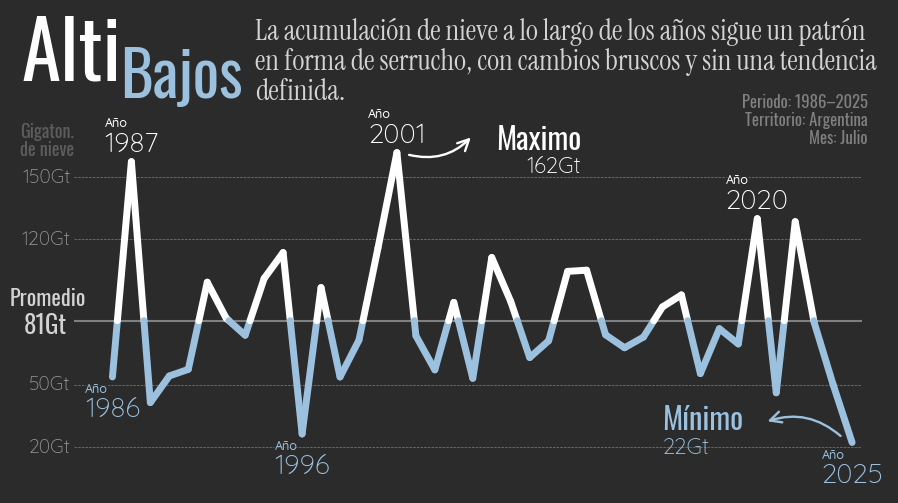

In [253]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow

# --- Preparar datos ---
X = df_toneladas_total["year"].values.reshape(-1, 1)
y = df_toneladas_total["nieve_toneladas"].values / 1e9  # gigatoneladas
years = df_toneladas_total["year"].values

# --- Ajustar regresión lineal ---
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# --- Gráfico base ---
fig, ax = plt.subplots(figsize=(9, 5), facecolor="#2b2b2b")
ax.set_facecolor("#2b2b2b")

# --- Métricas auxiliares ---
y_span = y.max() - y.min()
offset = y_span * 0.032  # desplazamiento proporcional

# --- Promedio histórico ---
promedio_toneladas = y.mean()
promedio_redondeado = int(round(promedio_toneladas, 0))

# Extender un poco el eje X hacia la izquierda (ajustá el 2 según necesites)
left, right = ax.get_xlim()
ax.set_xlim(years.min() - 2, right)

# Línea del promedio
ax.axhline(promedio_toneladas, color="gray", linestyle="-", linewidth=1.5, zorder=-3)

x_left_label = years.min() - 9.5  # dentro del nuevo xlim
ax.text(1980.6, promedio_toneladas + 0.04*y_span, "Promedio",
        color="lightgray", fontsize=16, ha="left", va="bottom",
        fontproperties=oswald, linespacing=1.0)
ax.text(1981.35, promedio_toneladas + 0.03*y_span, f"{promedio_redondeado}Gt",
        color="lightgray", fontsize=18, ha="left", va="top", fontproperties=oswald)

# --- Base line for visual continuity ---
ax.plot(years, y, color="#2b2b2b", linewidth=4.1, zorder=-1)

# --- Main line with dynamic color and split at average crossings ---
for i in range(len(years) - 1):
    x0, x1 = years[i], years[i + 1]
    y0, y1 = y[i], y[i + 1]

    same_side = (y0 - promedio_toneladas) * (y1 - promedio_toneladas) >= 0
    if same_side:
        color = "white" if y0 >= promedio_toneladas else "#9bc1df"
        ax.plot([x0, x1], [y0, y1], color=color, linewidth=5,
                solid_capstyle="round", zorder=1)
    else:
        # Crossing interpolation
        t  = (promedio_toneladas - y0) / (y1 - y0)
        xc = x0 + t * (x1 - x0)
        yc = promedio_toneladas
        color0 = "white" if y0 >= promedio_toneladas else "#9bc1df"
        color1 = "white" if y1 >= promedio_toneladas else "#9bc1df"
        ax.plot([x0, xc], [y0, yc], color=color0, linewidth=5,
                solid_capstyle="round", zorder=1)
        ax.plot([xc, x1], [yc, y1], color=color1, linewidth=5,
                solid_capstyle="round", zorder=1)

# --- Labels: stacked "Year" with conditional colors + semi-opaque background ---
for year_label in [1986, 1996, 2025, 1987, 2001, 2020]:
    idx = np.where(years == year_label)[0][0]
    valor_gt   = y[idx]
    diferencia = valor_gt - promedio_toneladas
    es_arriba  = diferencia >= 0
    va = "bottom" if es_arriba else "top"

    color_year = "white" if es_arriba else "#9bc1df"

    ax_text(
        x=years[idx],
        y=valor_gt + offset*0.6 if es_arriba else valor_gt - offset*0.6,
        s="<Año>\n<" + str(year_label) + ">",
        ax=ax,
        vsep=1,
        ha="center", va=va,
        highlight_textprops=[
            {"color": color_year, "fontsize": 9,  "fontproperties": quick_med},  # "Year"
            {"color": color_year, "fontsize": 20, "fontproperties": quick}       # year
        ],
        bbox=dict(
            facecolor=ax.figure.get_facecolor(),  # same as figure background
            edgecolor="none",
            boxstyle="square,pad=0",              # zero padding
            alpha=0.7
        )
    )

# --- Gridlines fijas en valores absolutos (Gt) ---
niveles_gt = [150, 120, 50, 20]  # en Gt

for nivel in niveles_gt:
    # línea tenue al fondo
    ax.axhline(
        nivel, color="lightgray", linestyle="--", linewidth=0.5,
        zorder=-4, alpha=0.5
    )
    # etiqueta a la izquierda, en segundo plano
    ax.text(
        years.min() - 2.2, nivel, f"{int(nivel)}Gt",
        ha="right", va="center",
        color="lightgray", fontsize=14,
        fontproperties=quick, alpha=0.65
    )

# --- Axes and spines ---
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel("")
ax.get_xaxis().set_visible(False)

# Set X limits once, based on your data range
ax.set_xlim(years.min() - 2, years.max() + 0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# ARROWS and TEXTS

ax_arrow(
   tail_position=[2001.5, 161],
   head_position=[2005,   170],
   color="white",
   double_headed=False,
   fill_head=False,
   width=1.7,
   linestyle="-",
   radius=0.3,
   ax=ax
)
ax.text(
    2010.7, 168,  
    "Maximo",
    color="white",
    fontsize=22,
    ha="right", va="center",
    fontproperties=oswald,
    linespacing=1.0
)
y_max = np.nanmax(y)
ax.text(
    2010.7, 155,          
    f"{y_max:.0f}Gt",
    color="white",
    fontsize=16,
    ha="right", va="center",
    fontproperties=quick
)

ax_arrow(
   tail_position=[2024.5, 24.5],
   head_position=[2020.4,   32],
   color="#9bc1df",
   double_headed=False,
   fill_head=False,
   width=1.7,
   linestyle="-",
   radius=0.3,
   ax=ax
)
ax.text(
    2015, 33, 
    "Mínimo",
    color="#9bc1df",
    fontsize=22,
    ha="left", va="center",
    fontproperties=oswald,
    linespacing=1.0
)
y_min = np.nanmin(y)
ax.text(
    2015, 25,            
    f"{y_min:.0f}Gt",
    color="#9bc1df",             
    fontsize=16,
    ha="left", va="top",
    fontproperties=quick
)

fig.text(
    0.049,0.73,  
    "Gigaton.\nde nieve",
    color="gray",
    fontsize=13,
    ha="center", va="center",
    fontproperties=oswald,
        linespacing=1.0, alpha=0.6
)

fig.text(
    0.96,0.77,  
    "Periodo: 1986–2025\nTerritorio: Argentina\nMes: Julio",
    color="gray",
    fontsize=12,
    ha="right", va="center",
    fontproperties=oswald,
    linespacing=1.1
)

# ---------- TITLE AND SUBTITLE ----------
plt.tight_layout(pad=1, rect=[0.0, 0.0, 1.0, 0.83])

# Title with highlight in "Ups and downs"
fig_text(
    0.02, 0.98,
    "<Alti>",
    highlight_textprops=[
        {"color": "white", "fontproperties": oswald, "fontsize": 57}
    ],
    ha="left", va="top",
    color="white", fontsize=40, fontproperties=roboto_cond_reg
)

fig_text(
    0.13, 0.92,   # same X but lower Y
    "<Bajos>",
    highlight_textprops=[
        {"color": "#9bc1df", "fontproperties": oswald, "fontsize": 45}
    ],
    ha="left", va="top",
    color="white", fontsize=40, fontproperties=roboto_cond_reg
)



# Subtítulo
fig.text(
    0.28 , 0.975,
    "La acumulación de nieve a lo largo de los años sigue un patrón\nen forma de serrucho, con cambios bruscos y sin una tendencia\ndefinida.",
    ha="left", va="top", color="lightgray",
    fontsize=21, fontproperties=instrument, linespacing=1.1
)

# --- Guardado y despliegue ---
fig.savefig("grafico_de_lineas_español.png", dpi=400, facecolor=fig.get_facecolor())
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'path'   # convierte texto a curvas

# --- Guardado y despliegue ---
fig.savefig(
    "grafico_de_lineas_español.svg",
    format="svg",
    bbox_inches="tight",
    pad_inches=0.25,
    facecolor=fig.get_facecolor()
)
plt.show()

In [254]:
import pandas as pd
import numpy as np
import calendar

# --- Cargar archivo parquet ---
df_yearly = pd.read_parquet("snowfall_ARG_YEARLY_1985_2024.parquet")
df_yearly["date"] = pd.to_datetime(df_yearly["date"])

# --- Filtrar datos inválidos ---
df_yearly = df_yearly[df_yearly["snowfall_mm"].notna()]
df_yearly = df_yearly[df_yearly["snowfall_mm"] > 0]

# --- Agregar columnas auxiliares ---
df_yearly["doy"] = df_yearly["date"].dt.dayofyear
df_yearly["year"] = df_yearly["date"].dt.year

# --- Estimar área por punto: sup. promedio en km² de celda ERA5 (0.25° x 0.25° ≈ 625 km²) ---
superficie_celda_km2 = 625  # estimado razonable en Argentina

# --- Calcular nieve en toneladas por punto ---
df_yearly["snowfall_ton"] = df_yearly["snowfall_mm"] * superficie_celda_km2 * 1_000  # mm * km² * 1000 → toneladas

# --- Agregar por día total sobre Argentina ---
df_total_ton = df_yearly.groupby(["year", "doy"])["snowfall_ton"].sum().reset_index()

# --- Eliminar outliers extremos (> 99.5 percentil) ---
umbral_max = df_total_ton["snowfall_ton"].quantile(0.995)
df_total_ton = df_total_ton[df_total_ton["snowfall_ton"] <= umbral_max]

# --- Promedio climatológico diario ---
df_clim_diario = df_total_ton.groupby("doy")["snowfall_ton"].mean().reset_index()

# --- Crear fecha ficticia (año 2000) y extraer mes ---
df_clim_diario["date"] = pd.to_datetime("2000-01-01") + pd.to_timedelta(df_clim_diario["doy"] - 1, unit="D")
df_clim_diario["month"] = df_clim_diario["date"].dt.month

# --- Convertir a millones de toneladas ---
df_clim_diario["snowfall_Mton"] = df_clim_diario["snowfall_ton"] / 1_000_000

# --- Reordenar columnas ---
df_clim_diario = df_clim_diario[["doy", "date", "month", "snowfall_Mton"]]

# --- Mostrar resultado final ---
print("✅ Nieve promedio diaria sobre Argentina (1985–2024), en millones de toneladas:")
print(df_clim_diario.head())

# --- Calcular total mensual promedio ---
df_mensual = df_clim_diario.groupby("month")["snowfall_Mton"].sum().reset_index()

# --- Identificar el mes con más nieve ---
mes_max = df_mensual.loc[df_mensual["snowfall_Mton"].idxmax()]

# --- Ordenar los meses de mayor a menor según nieve promedio ---
top_meses = df_mensual.sort_values("snowfall_Mton", ascending=False).head(3).reset_index(drop=True)

# --- Mostrar los 3 primeros ---
print(f"\n📆 Top 3 meses con mayor caída de nieve promedio (1985–2024):")
for i, row in top_meses.iterrows():
    mes_nombre = calendar.month_name[int(row['month'])]
    toneladas = row['snowfall_Mton']
    print(f"   {i+1}. {mes_nombre}: {toneladas:.2f} millones de toneladas")

# --- Día del año con mayor caída de nieve promedio ---
dia_max = df_clim_diario.loc[df_clim_diario["snowfall_Mton"].idxmax()]
fecha_max = dia_max["date"]
print(f"\n📅 Día con mayor nieve promedio: {fecha_max.strftime('%d de %B')} ({dia_max['snowfall_Mton']:.2f} Mton)")

# --- Semana del año (0–52) ---
df_clim_diario["week"] = df_clim_diario["date"].dt.isocalendar().week

# --- Promedio semanal ---
df_semanal = df_clim_diario.groupby("week")["snowfall_Mton"].sum().reset_index()
semana_max = df_semanal.loc[df_semanal["snowfall_Mton"].idxmax()]
print(f"🗓️ Semana con mayor nieve promedio: semana {int(semana_max['week'])} ({semana_max['snowfall_Mton']:.2f} Mton)")

# --- Día de la semana con más nieve (lunes = 0) ---
df_clim_diario["weekday"] = df_clim_diario["date"].dt.weekday
df_dow = df_clim_diario.groupby("weekday")["snowfall_Mton"].mean().reset_index()
dow_max = df_dow.loc[df_dow["snowfall_Mton"].idxmax()]
nombre_dia = calendar.day_name[int(dow_max["weekday"])]
print(f"📌 Día de la semana con mayor nieve promedio: {nombre_dia} ({dow_max['snowfall_Mton']:.2f} Mton)")

# --- Calcular nieve acumulada en JUN–JUL–AGO ---
nieve_JJA = df_mensual[df_mensual["month"].isin([6, 7, 8])]["snowfall_Mton"].sum()
nieve_total_anual = df_mensual["snowfall_Mton"].sum()
porcentaje_JJA = 100 * nieve_JJA / nieve_total_anual

# --- Mostrar resultado ---
print(f"\n❄️ Proporción de nieve caída en Jun–Jul–Ago: {porcentaje_JJA:.1f}% del total anual promedio")

# --- Calcular nieve mensual por año ---
df_yearly["month"] = df_yearly["date"].dt.month

# Convertir nieve a millones de toneladas (Mton)
df_yearly["snowfall_Mton"] = df_yearly["snowfall_ton"] / 1_000_000

# Agregar nieve total por mes y año (para toda Argentina)
df_mensual_anual = (
    df_yearly.groupby(["year", "month"])["snowfall_Mton"]
    .sum()
    .reset_index()
)

# Filtrar meses JJA (junio, julio, agosto)
df_JJA = df_mensual_anual[df_mensual_anual["month"].isin([6, 7, 8])]

# --- Calcular estadísticas descriptivas por mes ---
variabilidad_jja = (
    df_JJA.groupby("month")["snowfall_Mton"]
    .agg(["mean", "std", "min", "max", "median"])
    .reset_index()
)

# --- Mostrar resultados ---
print("📊 Variabilidad interanual de nieve mensual (Junio–Julio–Agosto) [1985–2024]:")
for _, row in variabilidad_jja.iterrows():
    mes = calendar.month_name[int(row["month"])]
    print(f"🗓️ {mes}:")
    print(f"   • Promedio: {row['mean']:.2f} Mton")
    print(f"   • Desvío estándar: {row['std']:.2f} Mton")
    print(f"   • Mínimo: {row['min']:.2f} Mton")
    print(f"   • Máximo: {row['max']:.2f} Mton")
    print(f"   • Mediana: {row['median']:.2f} Mton\n")

✅ Nieve promedio diaria sobre Argentina (1985–2024), en millones de toneladas:
   doy       date  month  snowfall_Mton
0    1 2000-01-01      1      54.686672
1    2 2000-01-02      1      49.843164
2    3 2000-01-03      1      56.950700
3    4 2000-01-04      1      58.150892
4    5 2000-01-05      1      60.349612

📆 Top 3 meses con mayor caída de nieve promedio (1985–2024):
   1. June: 17432.16 millones de toneladas
   2. August: 17339.71 millones de toneladas
   3. July: 16954.82 millones de toneladas

📅 Día con mayor nieve promedio: 15 de August (845.22 Mton)
🗓️ Semana con mayor nieve promedio: semana 33 (4720.09 Mton)
📌 Día de la semana con mayor nieve promedio: Wednesday (283.69 Mton)

❄️ Proporción de nieve caída en Jun–Jul–Ago: 53.5% del total anual promedio
📊 Variabilidad interanual de nieve mensual (Junio–Julio–Agosto) [1985–2024]:
🗓️ June:
   • Promedio: 19535.74 Mton
   • Desvío estándar: 7955.45 Mton
   • Mínimo: 10055.24 Mton
   • Máximo: 32964.08 Mton
   • Mediana: 160

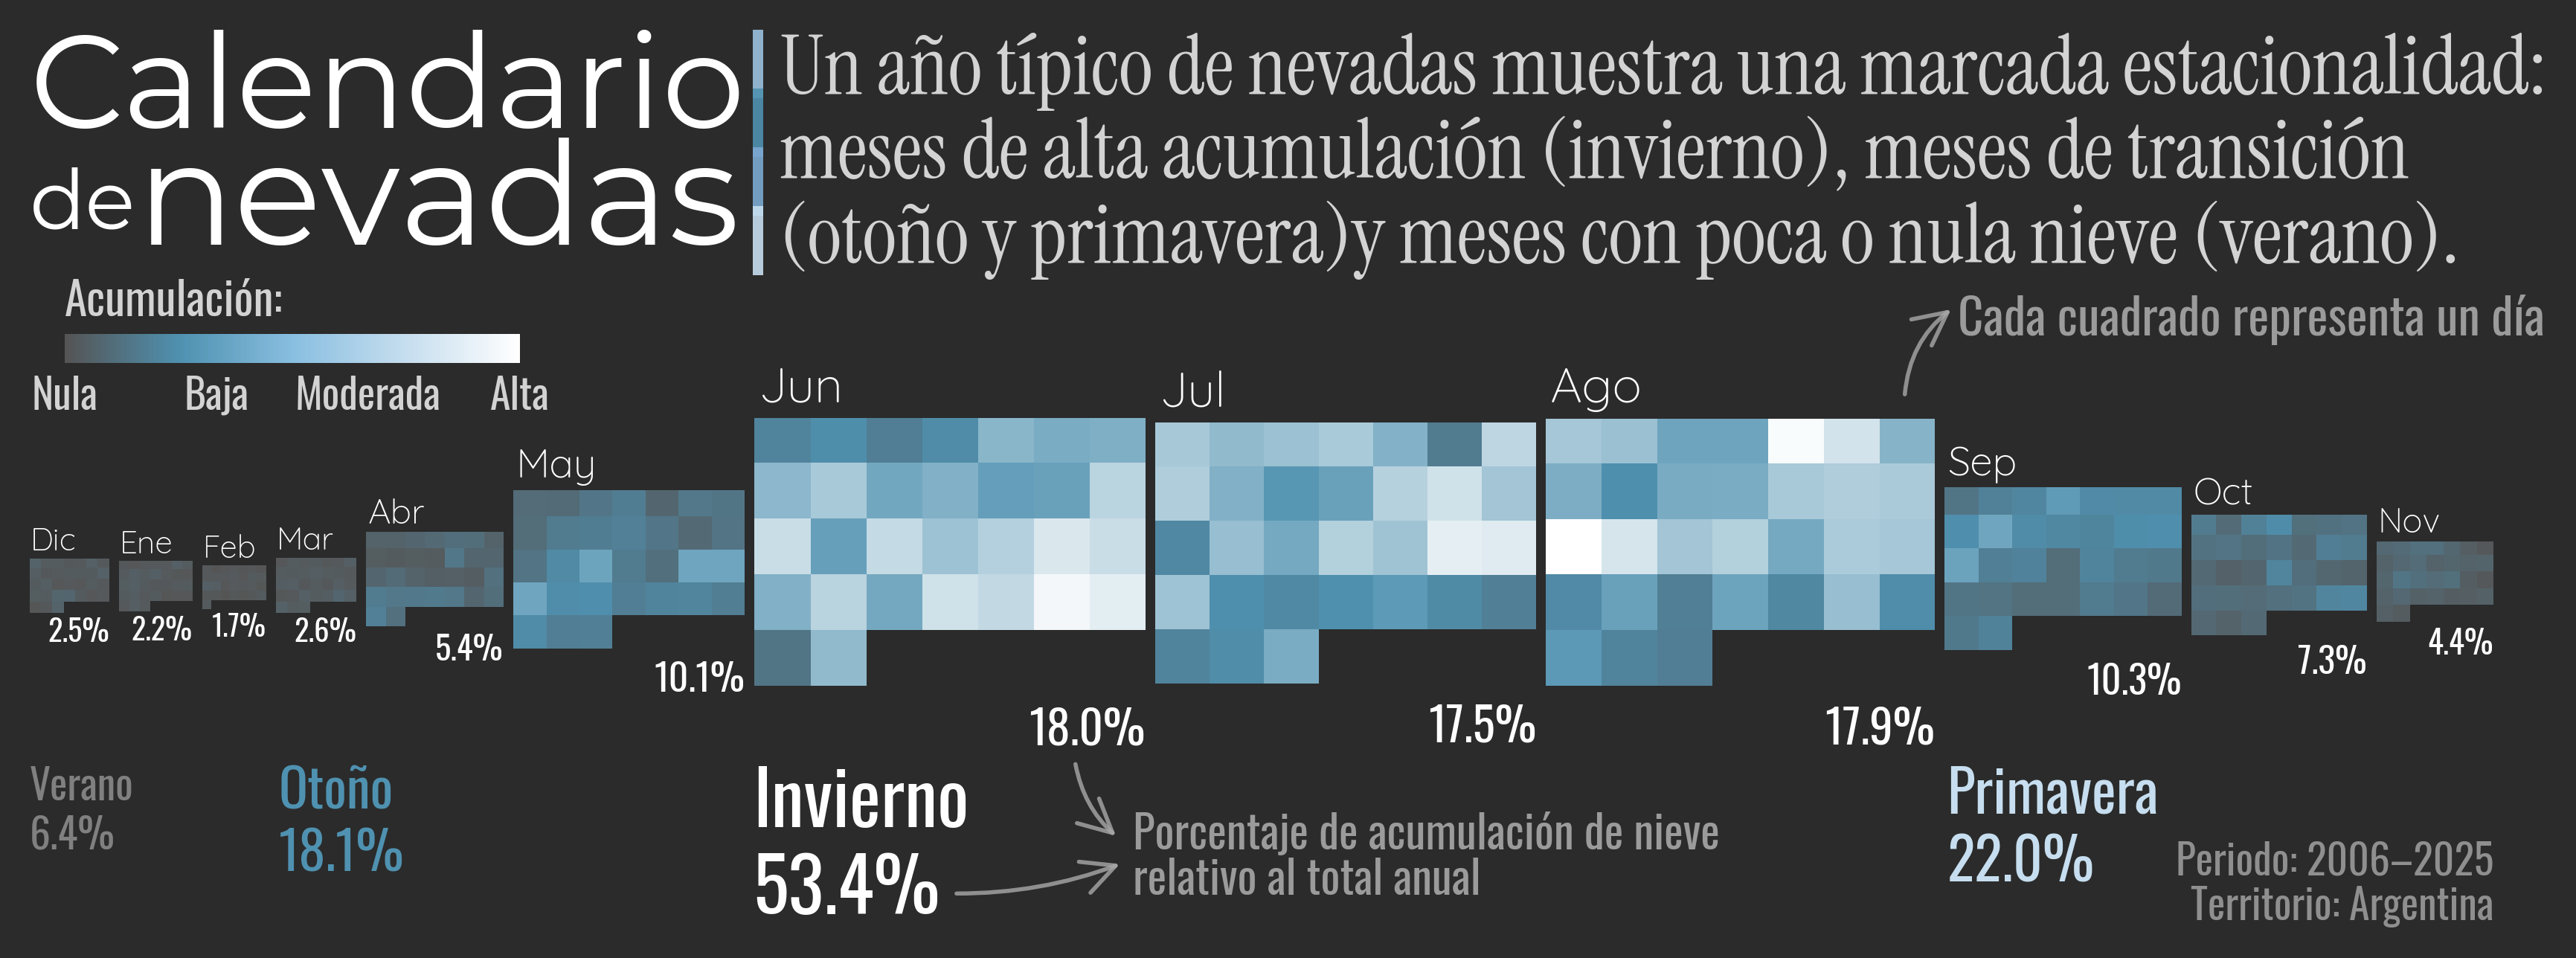

In [320]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap, Normalize
from drawarrow import ax_arrow, fig_arrow
from highlight_text import ax_text, fig_text

# --------- Visual parameters ----------
fondo = "#2b2b2b"
# Reordered to start in December and end in November
month_order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
month_labels = ["Dic","Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov"]

# Colormap gray → blue → white
colors = ["#555555", "#4f91b0", "#ffffff"]
cmap = LinearSegmentedColormap.from_list("gray_blue_white", colors)

# --------- 1) Ensure month column ----------
if "month" not in df_clim_diario.columns:
    df_clim_diario = df_clim_diario.copy()
    df_clim_diario["month"] = pd.to_datetime(df_clim_diario["date"]).dt.month

# --------- 2) Add monthly snow in Gt ----------
mes_gt = (
    df_clim_diario.groupby("month")["snowfall_Mton"]
    .sum()
    .astype(float) / 1000.0   # Mton → Gt
)  # Index 1..12
total_gt = mes_gt.sum()

# --------- 3) Ratios for GridSpec (reordered dec→nov) ----------
max_gt = mes_gt.max()
min_frac = 0.08
epsilon = min_frac * max_gt
ratios_raw = mes_gt.reindex(month_order).values + epsilon
width_ratios = ratios_raw

# --- Scale for font size ---
wr_min = float(np.min(width_ratios))
wr_max = float(np.max(width_ratios))
den = (wr_max - wr_min) if (wr_max - wr_min) != 0 else 1.0
fs_min, fs_max = 7.5, 12

# --------- 4) Figure and GridSpec ----------
fig = plt.figure(figsize=(9, 3.3), dpi=400, facecolor=fondo)
gs = fig.add_gridspec(
    nrows=1, ncols=12, width_ratios=width_ratios,
    left=0.06, right=0.98, top=0.78, bottom=0.05, wspace=0.05
)

# ---- Title and subtitle (do not touch the plot) ----
import matplotlib.patches as mpatches

# Subtitle text
fig.text(
    0.06, 0.99,
    "Calendario",
    ha="left", va="top",
    fontsize=32,
    fontproperties=montserrat_reg,
    linespacing=0.8,
    color="white"
)
fig.text(
    0.06, 0.85,
    "de",
    ha="left", va="top",
    fontsize=20,
    fontproperties=montserrat_reg,
    linespacing=0.8,
    color="white"
)
fig.text(
    0.10, 0.88,
    "nevadas",
    ha="left", va="top",
    fontsize=35,
    fontproperties=montserrat_reg,
    linespacing=0.8,
    color="white"
)

import matplotlib.patches as mpatches

# Parámetros para los cuadrados
n_squares   = 4              # cantidad de cuadrados
square_w    = 0.004         # ancho
square_h    = 0.07           # alto
x_pos       = 0.33           # posición X inicial (fig coords)
y_start     = 0.92           # posición Y inicial (fig coords)
y_gap       = 0.060           # separación vertical entre cuadrados

# Colores (pueden repetirse o ser distintos)
colors = ["#9bc1df", "#4f91b0", "#7ca9d3", "#c6deef"]

# Loop para agregar cuadrados consecutivos verticales
for i in range(n_squares):
    fig.patches.append(
        mpatches.Rectangle(
            (x_pos, y_start - i * y_gap),  # posición
            square_w, square_h,            # tamaño
            transform=fig.transFigure,
            facecolor=colors[i % len(colors)], alpha=0.9
        )
    )

# Subtitle: Instrument Serif
fig.text(
    0.34, 0.987,
    "Un año típico de nevadas muestra una marcada estacionalidad:\n"
    "meses de alta acumulación (invierno), meses de transición\n(otoño y primavera)"
    "y meses con poca o nula nieve (verano).",
    ha="left", va="top", color="lightgray",
    fontsize=20, fontproperties=instrument,
    linespacing=1.1
)

# Normalizer for colors
vmin = df_clim_diario["snowfall_Mton"].min()
vmax = df_clim_diario["snowfall_Mton"].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# --------- 5) Draw months (dec→nov) ----------
day_width = 1.0
rows_visible = 5
altura = rows_visible

# Seasonal colors (match legend)
color_summer = "gray"     # very low
color_autumn = "#4f91b0"     # low
color_winter = "#ffffff"     # very high
color_spring = "#c6deef"     # high

for i in range(12):
    current_month = month_order[i]
    axm = fig.add_subplot(gs[0, i])
    axm.set_facecolor(fondo)
    axm.axis("off")

    # Font size proportional to assigned width
    wr = float(width_ratios[i])
    alpha = (wr - wr_min) / den
    month_fs = fs_min + (fs_max - fs_min) * alpha

    # Month label (top left)
    axm.text(
        0.01, 1.02, month_labels[i],
        color="white", fontsize=month_fs, fontproperties=quick,
        ha="left", va="bottom",
        transform=axm.transAxes, clip_on=False
    )

    # Month data
    df_month = df_clim_diario[df_clim_diario["month"] == current_month].copy()
    df_month["day"] = pd.to_datetime(df_month["date"]).dt.day
    num_days = len(df_month)

    # Day squares
    for _, row in df_month.iterrows():
        day = int(row["day"]) - 1
        col = day % 7
        row_ = day // 7
        color = cmap(norm(row["snowfall_Mton"])) if pd.notna(row["snowfall_Mton"]) else "#444444"
        axm.add_patch(
            patches.Rectangle(
                (col * day_width, altura - row_), day_width, 1.0,
                facecolor=color, edgecolor=None, linewidth=0
            )
        )

    # Fill gaps
    for j in range(num_days, 35):
        col = j % 7
        row_ = j // 7
        axm.add_patch(
            patches.Rectangle(
                (col * day_width, altura - row_), day_width, 1.0,
                facecolor=fondo, edgecolor=None, linewidth=0
            )
        )

    # Percentage of annual total
    pct = (mes_gt.loc[current_month] / total_gt) * 100 if total_gt != 0 else 0
    pct_fs = month_fs * 0.95
    axm.text(
        1, 0.18, f"{pct:.1f}%",
        color="white", fontsize=pct_fs, fontproperties=oswald,
        ha="right", va="top",
        transform=axm.transAxes, clip_on=False
    )

    axm.set_xlim(0, 7 * day_width)
    axm.set_ylim(-0.5, altura + 0.8)
    axm.set_aspect("equal", adjustable="box")

# --- Season labels aligned above the calendar ---
fig.text(0.06, 0.24, "Verano\n6.4%", color=color_summer,
         fontsize=10, fontproperties=oswald,
         ha="left", va="top")

fig.text(0.153, 0.24, "Otoño\n18.1%", color=color_autumn,
         fontsize=13, fontproperties=oswald,
         ha="left", va="top")

fig.text(0.33, 0.24, "Invierno\n53.4%", color=color_winter,
         fontsize=18, fontproperties=oswald,
         ha="left", va="top")

fig.text(0.776, 0.24, "Primavera\n22.0%", color=color_spring,
         fontsize=14, fontproperties=oswald,
         ha="left", va="top")


# --------- Continuous horizontal legend (movable block) ----------
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

legend_colors = ["#555555", "#4f91b0", "#89bfe1", "#c6deef", "#ffffff"]

# LEGEND
LEG_X, LEG_Y = 0.073, 0.65   # lower-left corner
LEG_W, LEG_H = 0.17, 0.03  # width and height of block

ax_leg = fig.add_axes([LEG_X, LEG_Y, LEG_W, LEG_H])
ax_leg.set_facecolor(fondo)
ax_leg.axis("off")

grad = np.linspace(0, 1, 256)[None, :]
cmap_leg = LinearSegmentedColormap.from_list("legend_grad_h", legend_colors)
ax_leg.imshow(
    grad, extent=[0, 1, 0, 1],
    origin="lower", aspect="auto",
    cmap=cmap_leg, interpolation="bicubic"
)
ax_leg.set_xlim(0, 1)
ax_leg.set_ylim(0, 1)

# --- Legend title ---
TITLE_PAD = 0.01
fig.text(
    LEG_X, LEG_Y + LEG_H + TITLE_PAD,
    "Acumulación:",
    fontproperties=oswald,
    fontsize=11, color="lightgray",
    ha="left", va="bottom"
)

# --- Legend labels below bar ---
labels = [("Nula", "gray"),
          ("Baja", "#4f91b0"),
          ("Moderada", "#89bfe1"),
          ("Alta", "#ffffff")]

x_fracs = [0.00, 1/3, 2/3, 1.00]
LABEL_PAD = 0.007

for (texto, color), xf in zip(labels, x_fracs):
    fig.text(
        LEG_X + xf * LEG_W, LEG_Y - LABEL_PAD-0.005,
        texto,
        fontproperties=oswald,
        fontsize=10,
        color="lightgray",
        ha="center", va="top"
    )

# ------- Arrow and summary text -------
fig_arrow(
   tail_position=[0.76, 0.61],
   head_position=[0.78, 0.71],
   color="darkgray",
   double_headed=False,
   fill_head=False,
   width=1,
   linestyle="-",
   radius=-0.25, alpha=0.8
)

fig.text(
        0.78 , 0.72,
        "Cada cuadrado representa un día",
        fontproperties=oswald,
        fontsize=12, color="#b8b8b8",
        ha="left", va="top", alpha=0.8
    )


fig_arrow(
   tail_position=[0.403, 0.110],
   head_position=[0.47, 0.143],
   color="darkgray",
   double_headed=False,
   fill_head=False,
   width=1,
   linestyle="-",
   radius=0.1, alpha=0.8
)
fig_arrow(
   tail_position=[0.45, 0.25],
   head_position=[0.468, 0.163],
   color="darkgray",
   double_headed=False,
   fill_head=False,
   width=1,
   linestyle="-",
   radius=0.2, alpha=0.8
)

fig.text(
        0.472 , 0.193,
        "Porcentaje de acumulación de nieve\nrelativo al total anual",
        fontproperties=oswald,
        fontsize=11, color="#b8b8b8",
        ha="left", va="top", linespacing=1.0, alpha=0.8
    )

fig.text(
    0.98, 0.12,
    "Periodo: 2006–2025\nTerritorio: Argentina",
    color="#a9a9a9",
    fontsize=10,
    ha="right", va="center",
    fontproperties=oswald,
    linespacing=1.1, alpha=0.8
)

# --- Save figure PNG
fig.savefig(
    "snowfall_calendar_español.png",
    dpi=400,
    facecolor=fig.get_facecolor(),
    bbox_inches="tight"
)
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'path'   # convert text to paths

# --- Save figure SVG
fig.savefig(
    "snowfall_calendar_español.svg",
    format="svg",
    bbox_inches="tight",
    pad_inches=0.25,
    facecolor=fig.get_facecolor()
)
plt.show()

/var/folders/b8/g8r4mzvj7pg79w2br6cpzy8c0000gn/T/ipykernel_1510/2934730161.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


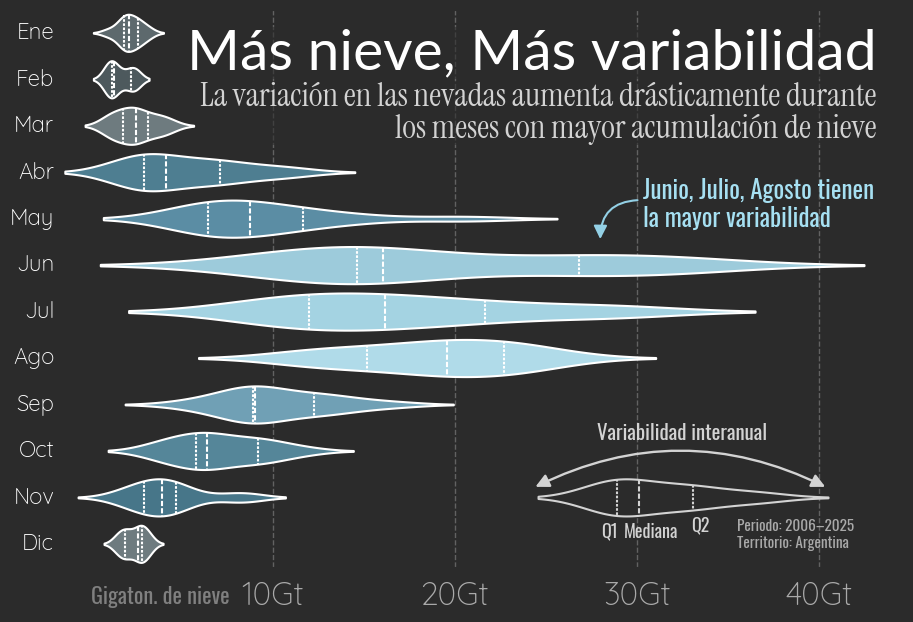

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar
from drawarrow import ax_arrow

# --- Prepare dataset ---
df_yearly["date"] = pd.to_datetime(df_yearly["date"])
df_yearly["year"] = df_yearly["date"].dt.year
df_yearly["month"] = df_yearly["date"].dt.month

# --- Calculate snow in Gt ---
cell_area_km2 = 625
df_yearly["snowfall_ton"] = df_yearly["snowfall_mm"] * cell_area_km2 * 1_000
df_yearly["snowfall_Gton"] = df_yearly["snowfall_ton"] / 1_000_000_000

# --- Months in English abbreviated ---
months_eng = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
df_yearly["Month"] = df_yearly["month"].apply(lambda x: months_eng[x - 1])
order_months = months_eng

# --- Group by month and year ---
df_monthly_yearly = (
    df_yearly.groupby(["year", "Month"])["snowfall_Gton"]
    .sum()
    .reset_index()
)

# --- Create figure ---
background = "#2b2b2b"
fig, ax = plt.subplots(figsize=(9, 6), facecolor=background)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

# --- Palette inspired by #4f91b0, manually assigned by median ---
colors_by_month = {
    "Feb": "#4a5a60",  # más oscuro
    "Ene": "#5a6a70",
    "Mar": "#6b7c82",
    "Dic": "#6b7c82",
    "Nov": "#3c7b94",
    "Abr": "#43839c",
    "Oct": "#4a8ba4",
    "May": "#4f91b0",  # color base
    "Sep": "#65a4c0",
    "Jun": "#93d0e5",
    "Jul": "#9ad8ec",
    "Ago": "#a6e0f2"   # más claro
}

# --- Horizontal violinplots ---
sns.violinplot(
    data=df_monthly_yearly,
    y="Month",
    x="snowfall_Gton",
    order=order_months,
    palette=colors_by_month,
    linewidth=1.5,
    edgecolor="white",
    inner="quart",
    ax=ax
)

# --- Extra violin (cloned from "Apr" and +26 Gt) with Seaborn, without touching others ---
vals_apr = df_monthly_yearly.loc[df_monthly_yearly["Month"] == "Abr", "snowfall_Gton"].values
df_extra = pd.DataFrame({
    "Month": ["Nov"] * len(vals_apr),          
    "snowfall_Gton": vals_apr + 26           
})

# 1) Save how many collections existed BEFORE
n_before = len(ax.collections)

# 2) Draw the extra violin
sns.violinplot(
    data=df_extra,
    y="Month",
    x="snowfall_Gton",
    order=order_months,
    color=background,        
    linewidth=1.5,
    edgecolor="lightgray",
    inner="quart",
    ax=ax
)

# 3) Recolor ONLY the new collections (the extra violin)
new_artists = ax.collections[n_before:]
for artist in new_artists:
    artist.set_linewidth(1.5)

# --- Paint axes same as background (invisible) ---
ax.spines['top'].set_color(background)
ax.spines['right'].set_color(background)
ax.spines['bottom'].set_color(background)
ax.spines['left'].set_color(background)

ax.tick_params(colors=background)  
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(
    left=False, bottom=False,
    labelleft=False, labelbottom=False
)

# --- Re-add manual Y axis text (months) ---
y_pos = ax.get_yticks()
for y, month in zip(y_pos, order_months):
    ax.text(
        x=-2, y=y, s=month,
        va="center", ha="right",
        fontsize=16, color="white",
        fontproperties=quick
    )

# --- Re-add manual X axis text (estimated values) ---
x_labels = [10, 20, 30, 40]
for val in x_labels:
    ax.text(
        x=val, y=11.8, s=f"{val}Gt",
        ha="center", va="top",
        fontsize=23, color="white",
        fontproperties=quick,
        alpha=0.6
    )

# --- Add vertical guide lines behind ---
for val in x_labels:
    ax.axvline(x=val, color="#888888", linestyle="--", linewidth=1, zorder=0, alpha=0.6)

# --- Add title and subtitle ---
fig.text(
    0.97, 0.97,
    "Más nieve, Más variabilidad",
    fontproperties=lato,
    fontsize=41, color="white",
    ha="right", va="top",
    bbox=dict(facecolor=background, alpha=0.6, edgecolor="none", pad=0.3)
)

fig.text(
    0.97, 0.88,
    "La variación en las nevadas aumenta drásticamente durante\nlos meses con mayor acumulación de nieve",
    fontproperties=instrument,
    fontsize=24, color="lightgray",
    ha="right", va="top",
    linespacing=1.05,
    bbox=dict(facecolor=background, alpha=0.6, edgecolor="none", pad=0.3)
)

# ARROWS AND TEXT
offset_x = -1.5  

ax_arrow(
   tail_position=[25.8 + offset_x, 9.8],
   head_position=[42.0 + offset_x, 9.8],
   color="lightgray",
   double_headed=True,
   fill_head=True,
   width=1.7,
   linestyle="-",
   radius=-0.25,
   ax=ax
)

ax.text(
    34.0 + offset_x, 8.4,
    "Variabilidad interanual",
    fontproperties=oswald,
    fontsize=15, color="lightgray",
    ha="center", va="top",
    linespacing=1.1
)

ax.text(
    32.3 + offset_x, 10.55,
    "Mediana",
    fontproperties=oswald,
    fontsize=13, color="lightgray",
    ha="center", va="top",
    linespacing=1.1
)

ax.text(
    30.0 + offset_x, 10.53,
    "Q1",
    fontproperties=oswald,
    fontsize=13, color="lightgray",
    ha="center", va="top",
    linespacing=1.1
)

ax.text(
    35.0 + offset_x, 10.4,
    "Q2",
    fontproperties=oswald,
    fontsize=13, color="lightgray",
    ha="center", va="top",
    linespacing=1.1
)

ax.text(
    37 + offset_x, 10.8,
    "Periodo: 2006–2025\nTerritorio: Argentina",
    color="darkgray",
    fontsize=11,
    ha="left", va="center",
    fontproperties=oswald,
    linespacing=1.1
)

ax_arrow(
   tail_position=[30.2, 3.6],
   head_position=[28, 4.5],
   color="#93d0e5",
   double_headed=False,
   fill_head=True,
   width=1.5,
   linestyle="-",
   radius=0.5,
   ax=ax
)

fig.text(
    0.71, 0.72,
    "Junio, Julio, Agosto tienen\nla mayor variabilidad",
    fontproperties=oswald,
    fontsize=18, color="#a6e0f2",
    ha="left", va="top",
    linespacing=1.1
)

ax.text(
    0.01, 11.9,
    "Gigaton. de nieve",
    fontproperties=oswald,
    fontsize=16, color="gray",
    ha="left", va="top",
    linespacing=1.1
)

plt.tight_layout(pad=0)

# --- Save figure PNG
fig.savefig(
    "snowfall_variability_español.png",
    dpi=400,
    facecolor=fig.get_facecolor()
)

import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'path'   # convert text to vector outlines

# --- Save figure SVG
fig.savefig(
    "snowfall_variability_español.svg",
    format="svg",
    bbox_inches="tight",
    pad_inches=0.25,
    facecolor=fig.get_facecolor()
)
plt.show()